<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span></li><li><span><a href="#Check-pulse-shape" data-toc-modified-id="Check-pulse-shape-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check pulse shape</a></span></li><li><span><a href="#Static-Hamiltonian" data-toc-modified-id="Static-Hamiltonian-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Static Hamiltonian</a></span></li><li><span><a href="#Driving-Hamiltonian" data-toc-modified-id="Driving-Hamiltonian-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Driving Hamiltonian</a></span></li><li><span><a href="#Dynamics-analysis" data-toc-modified-id="Dynamics-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dynamics analysis</a></span></li><li><span><a href="#Tomography" data-toc-modified-id="Tomography-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tomography</a></span></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Optimization</a></span><ul class="toc-item"><li><span><a href="#Optimize-amplitude" data-toc-modified-id="Optimize-amplitude-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Optimize amplitude</a></span></li><li><span><a href="#Optimize-with-DRAG" data-toc-modified-id="Optimize-with-DRAG-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Optimize with DRAG</a></span></li><li><span><a href="#Optimize-with-DRAG-+-detuning" data-toc-modified-id="Optimize-with-DRAG-+-detuning-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Optimize with DRAG + detuning</a></span></li><li><span><a href="#Optimize-with-pulse-rise-time" data-toc-modified-id="Optimize-with-pulse-rise-time-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Optimize with pulse rise time</a></span></li><li><span><a href="#Optimize-with-DRAG-+-rise-time" data-toc-modified-id="Optimize-with-DRAG-+-rise-time-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Optimize with DRAG + rise time</a></span></li></ul></li><li><span><a href="#Sweep-parameters" data-toc-modified-id="Sweep-parameters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sweep parameters</a></span><ul class="toc-item"><li><span><a href="#Sweep-amplitude,-find-gate-rate" data-toc-modified-id="Sweep-amplitude,-find-gate-rate-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Sweep amplitude, find gate rate</a></span></li><li><span><a href="#Sweep-detuning,-find-gate-rate" data-toc-modified-id="Sweep-detuning,-find-gate-rate-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Sweep detuning, find gate rate</a></span></li><li><span><a href="#Sweep-rise-time,-find-optimal-drive-amplitude" data-toc-modified-id="Sweep-rise-time,-find-optimal-drive-amplitude-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Sweep rise time, find optimal drive amplitude</a></span></li><li><span><a href="#Sweep-coupling-strength,-find-optimal-drive-amplitude" data-toc-modified-id="Sweep-coupling-strength,-find-optimal-drive-amplitude-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Sweep coupling strength, find optimal drive amplitude</a></span></li><li><span><a href="#Sweep-detuning,-find-fidelity,-vary-gate-time" data-toc-modified-id="Sweep-detuning,-find-fidelity,-vary-gate-time-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Sweep detuning, find fidelity, vary gate time</a></span></li><li><span><a href="#Sweep-detuning,-find-fidelity,-vary-qubit-qubit-coupling" data-toc-modified-id="Sweep-detuning,-find-fidelity,-vary-qubit-qubit-coupling-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Sweep detuning, find fidelity, vary qubit-qubit coupling</a></span><ul class="toc-item"><li><span><a href="#Subplot" data-toc-modified-id="Subplot-8.6.1"><span class="toc-item-num">8.6.1&nbsp;&nbsp;</span>Subplot</a></span></li></ul></li></ul></li></ul></div>

# Preamble

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as evol_gates
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import scipy.linalg
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from qutip.qip.operations import*
from matplotlib import rcParams

# Check pulse shape

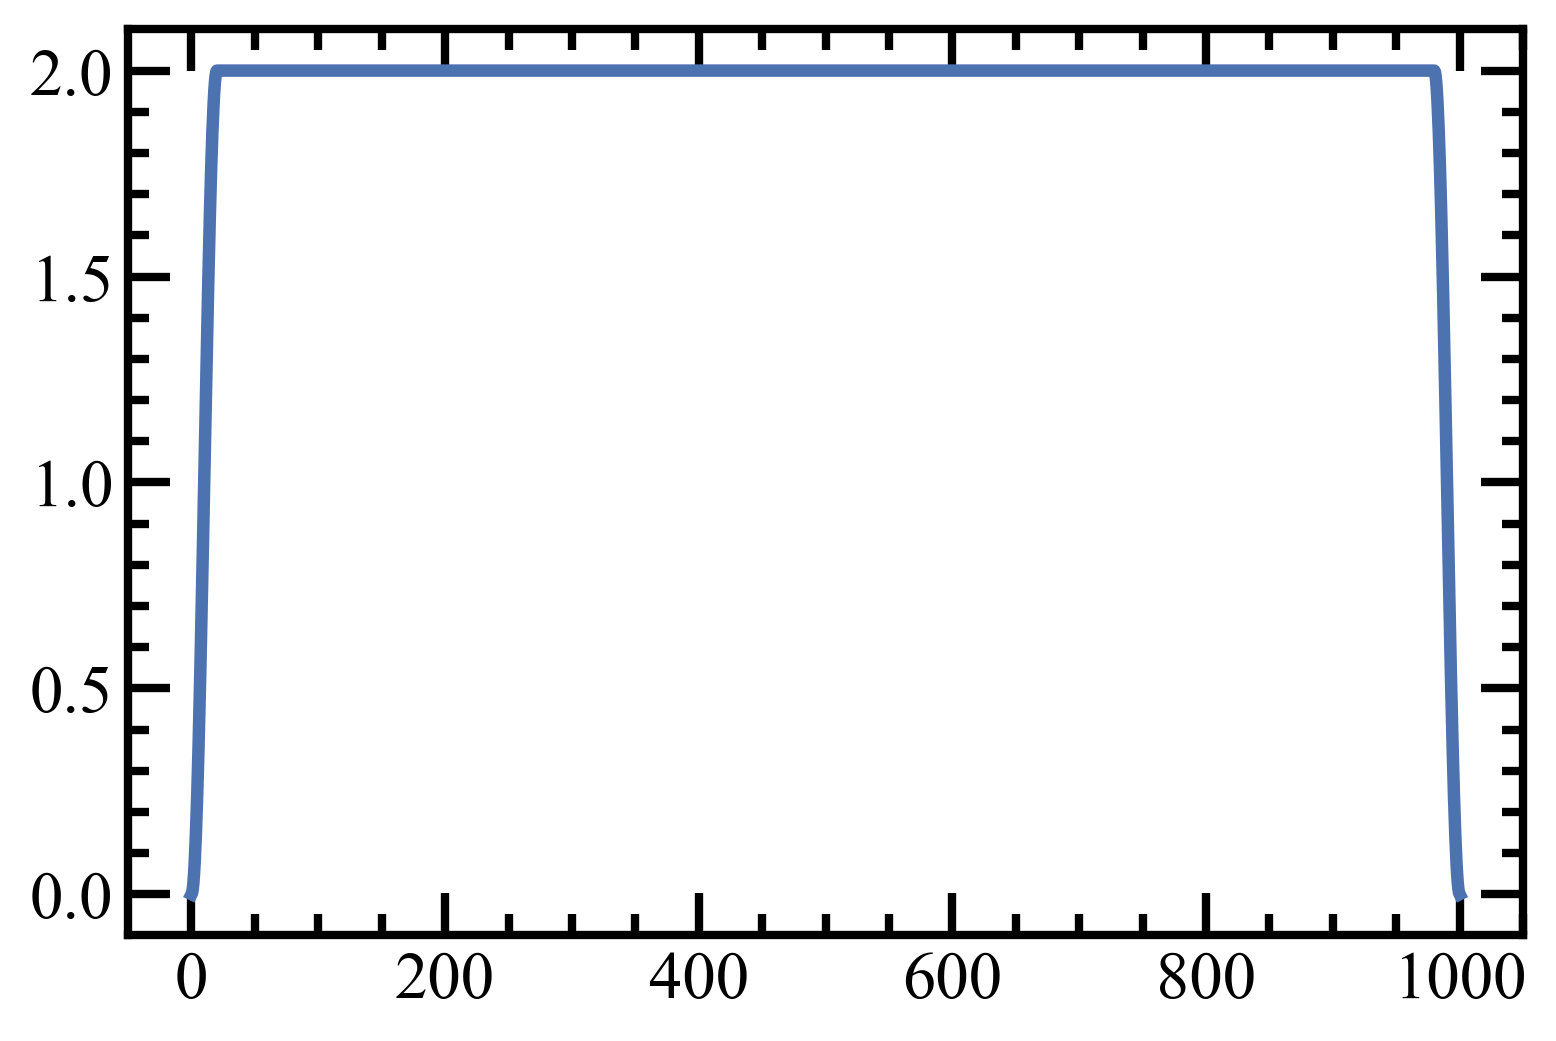

In [13]:
# Cosine flat top
T_start = 0
T_gate = 1000
sigma = 0.25
T_rise = 20

T_left = T_start + T_rise
T_right = T_start + T_gate - T_rise

t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
xi_x = np.zeros_like(t_points)
alpha = 0
xi_x = np.zeros_like(t_points)
xi_y = np.zeros_like(t_points)
# Without shift and normalization.
for idx, t in enumerate(t_points):
    if t < T_left:
        xi_x[idx] = 1+np.cos(2*np.pi*(t - T_left) / T_rise/2)
        xi_y[idx] = alpha * np.sin(2*np.pi*(t - T_left) / T_rise/2)
    elif t > T_right:
        xi_x[idx] = 1+np.cos(2*np.pi*(t - T_right) / T_rise/2)
        xi_y[idx] = -alpha * np.sin(2*np.pi*(t - T_right) / T_rise/2)
    else:
        xi_x[idx] = 2
        xi_y[idx] = 0
plt.plot (t_points, xi_x)

# Static Hamiltonian

In [14]:
#Define coupled two-level system Hamiltonian
IZ = tensor(qeye(2), sigmaz())
ZI = tensor(sigmaz(), qeye(2))
XI = tensor(sigmax(), qeye(2))
IX = tensor(qeye(2), sigmax())
YI = tensor(sigmay(), qeye(2))
IY = tensor(qeye(2), sigmay())
XX = tensor(sigmax(), sigmax())

def two_q_hamiltonian(w1, w2, J):
    return -0.5*w1*ZI - 0.5*w2*IZ + J*XX

#Qubit frequency
w1 = 5.45
w2 = 5.5

J = 0.01 #GHz
H0 = two_q_hamiltonian(w1, w2, J)
eig_energies, eig_states = H0.eigenstates() #System

state_00 = eig_states[0]
state_01 = eig_states[2]
state_10 = eig_states[1]
state_11 = eig_states[3]
sup_state0 = (state_00 + state_01)/np.sqrt(2)
sup_state1 = (state_10 + state_11)/np.sqrt(2)

print ((eig_energies[2]-eig_energies[0]) - (eig_energies[3]-eig_energies[1]))

1.7763568394002505e-15


# Driving Hamiltonian

In [15]:
drive_freq = eig_energies[2]-eig_energies[0] #Second qubit frequency

coupl_const = 17.86471363   #Rabi freq in MHz
eta = 0
coupl_const = coupl_const*1e-3*2*np.pi
H1 = coupl_const*(XI+eta*IX) #Driving first qubit only

#Gate parameters
shape = 'cosflattop'
T_start = 0
T_gate = 200
sigma = 0.25
T_rise = 50
drag = False
drag_coeff = 0.3
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)

#Using propagator
H_dum = tensor(qeye(2), qeye(2))*0
U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points = t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
# U_nothing = evol_gates.evolution_operator_microwave_nonorm(-H0,H_dum, t_points = t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
#         T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

# Dynamics analysis

In [5]:
trans_prob_00_00 = expect(state_00 * state_00.dag(),U_t*state_00)
trans_prob_00_01 = expect(state_01 * state_01.dag(),U_t*state_00)
trans_prob_00_10 = expect(state_10 * state_10.dag(),U_t*state_00)
trans_prob_00_11 = expect(state_11 * state_11.dag(),U_t*state_00)

# U_rw = U_nothing*U_t

sx0 = expect(IX,U_t*state_00)
sy0 = expect(IY,U_t*state_00)
sz0 = expect(IZ,U_t*state_00)
sx1 = expect(IX,U_t*state_10)
sy1 = expect(IY,U_t*state_10)
sz1 = expect(IZ,U_t*state_10)

# sx0 = expect(IX,U_t*XI*U_t*state_00)
# sy0 = expect(IY,U_t*XI*U_t*state_00)
# sz0 = expect(IZ,U_t*XI*U_t*state_00)
# sx1 = expect(IX,U_t*XI*U_t*state_10)
# sy1 = expect(IY,U_t*XI*U_t*state_10)
# sz1 = expect(IZ,U_t*XI*U_t*state_10)

# sx0 = expect(IX,U_rw*state_00)
# sy0 = expect(IY,U_rw*state_00)
# sz0 = expect(IZ,U_rw*state_00)
# sx1 = expect(IX,U_rw*state_10)
# sy1 = expect(IY,U_rw*state_10)
# sz1 = expect(IZ,U_rw*state_10)

# plt.plot(t_points, trans_prob_00_00, label = '00')
# plt.plot(t_points, trans_prob_00_01, label = '01')
# plt.plot(t_points, trans_prob_00_10, label = '10')
# plt.plot(t_points, trans_prob_00_11, label = '11')
# plt.plot(t_points, np.cos(2*np.pi*coupl_const*1e-2 * 1e9 *t_points*1e-9))

# fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = [10,12])
# ax1.plot(t_points, sx0, label = 'C0')
# ax1.plot(t_points, sx1, label = 'C1')
# ax2.plot(t_points, sy0, label = 'C0')
# ax2.plot(t_points, sy1, label = 'C1')
# ax3.plot(t_points, sz0, label = 'C0')
# ax3.plot(t_points, sz1, label = 'C1')

# ax1.legend()
# ax2.legend()
# ax3.legend()

# plt.xlabel('Time (ns)')
# plt.ylabel(r'$P$')

# b = Bloch()
# b.add_points([sx0, sy0, sz0], meth='l')
# b.make_sphere()
# b = Bloch()
# b.add_points([sx1, sy1, sz1], meth='l')
# b.make_sphere()

103.5
207
0.11408981928017775


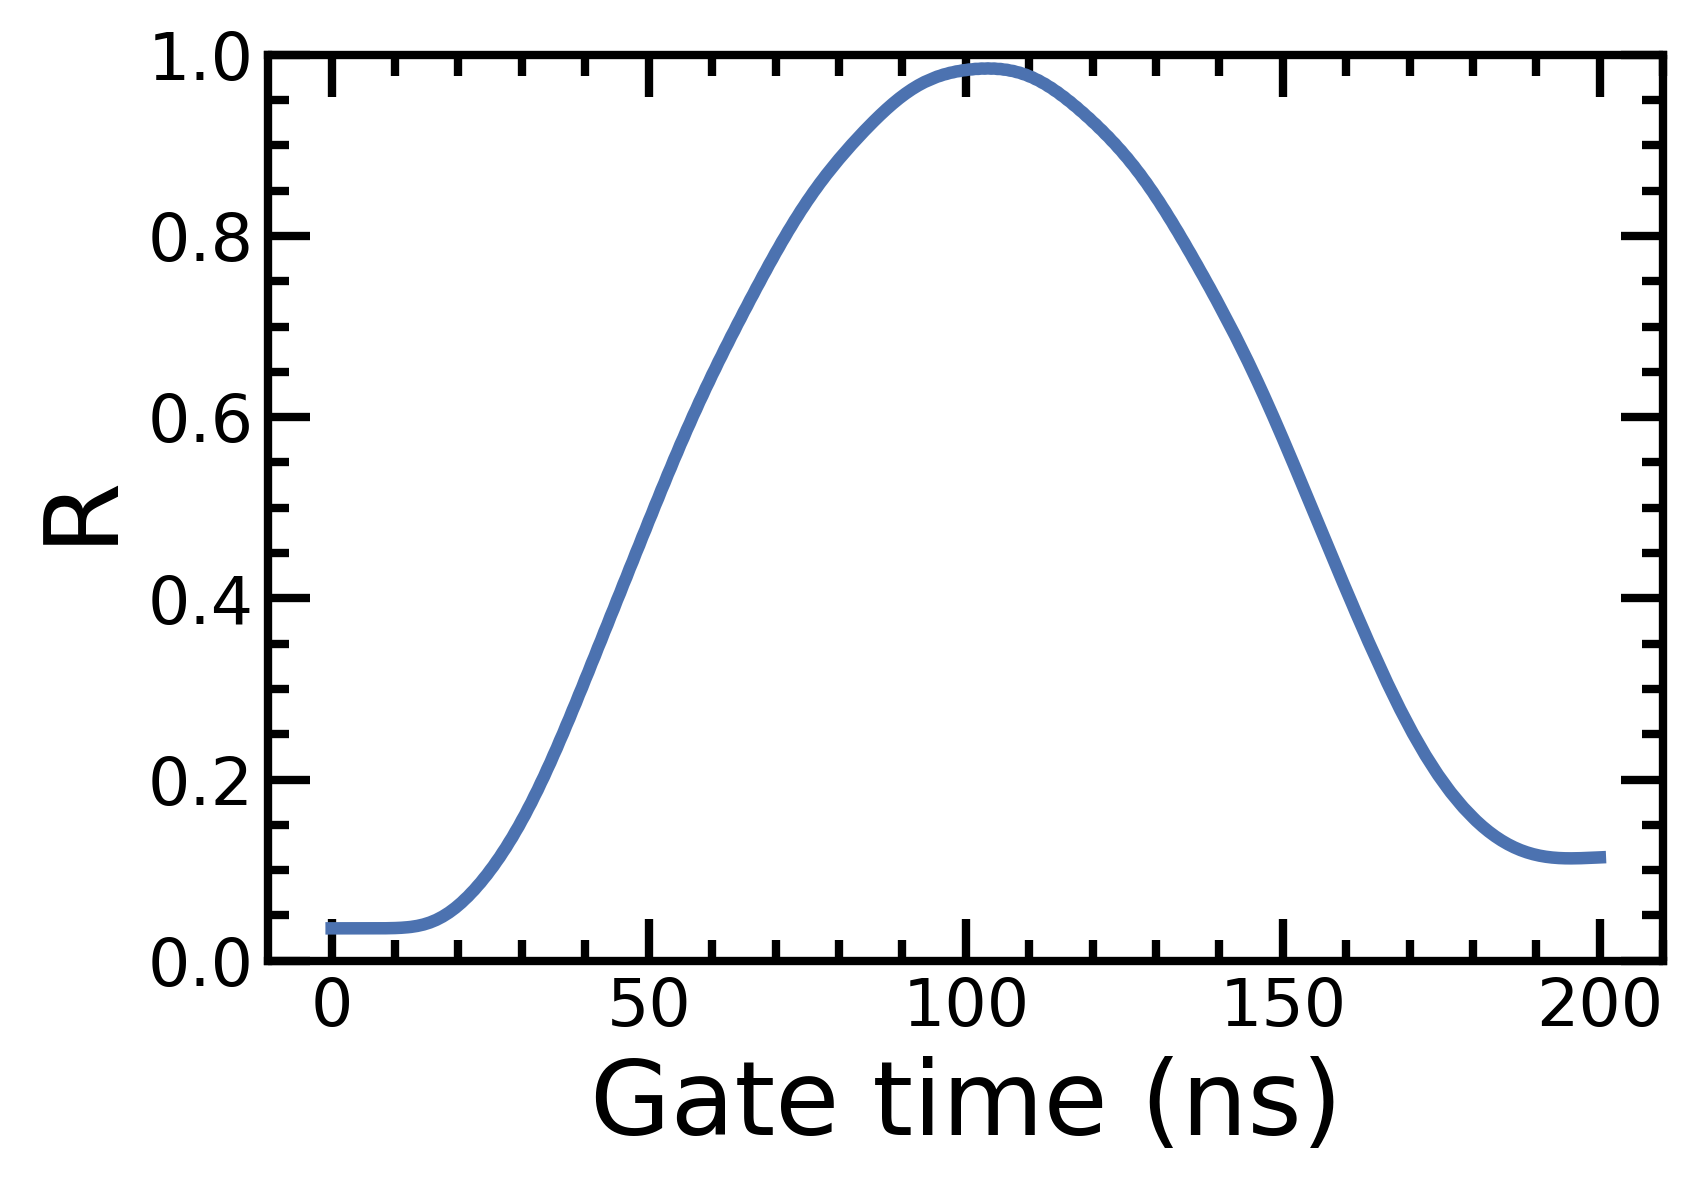

In [6]:
R = 0.5*np.sqrt((sx0-sx1)**2 + (sy0-sy1)**2+(sz0-sz1)**2)
plt.plot(t_points, R, label = '0')
plt.ylim([0,1])
plt.xlabel('Gate time (ns)')
plt.ylabel('R')
print (t_points[np.argmax(R)])
print(np.argmax(R))
print (R[-1])

In [7]:
u00 = U_t[-1].matrix_element(state_00.dag(), state_00)
u01 = U_t[-1].matrix_element(state_01.dag(), state_01)
u10 = U_t[-1].matrix_element(state_10.dag(), state_10)
u11 = U_t[-1].matrix_element(state_11.dag(), state_11)
phase1 = np.angle(u01/u00)
phase2 = np.angle(u10/u00)
phasezz = np.angle(u11*u00/(u01*u10))
print(phase1)
print(phase2)
print(phasezz)

single_qu_z = 0
single_qu_z = single_qu_z + state_00*state_00.dag()
single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
# zz_gate = 
U = single_qu_z*U_t[-1]

u00 = U.matrix_element(state_00.dag(), state_00)
u01 = U.matrix_element(state_01.dag(), state_01)
u10 = U.matrix_element(state_10.dag(), state_10)
u11 = U.matrix_element(state_11.dag(), state_11)
phase1 = np.angle(u00*u01/(u10*u11))
phase2 = np.angle(u00*u10/(u01*u11))
print(phase1)
print(phase2)
print (np.round(np.real(U),2))

-2.460280767344872
-1.4639394211838181
-4.618482243291116e-16
2.020139536448443e-16
-1.0100697682242203e-16
[[ 0.02 -0.91 -0.17  0.  ]
 [-0.9   0.02  0.   -0.17]
 [-0.17  0.    0.02  0.91]
 [ 0.   -0.17  0.9   0.02]]


In [8]:
rzx_m = np.diag(np.ones(4, dtype = complex))
rzx_m[0,2] = -1j
rzx_m[1,3] = 1j
rzx_m[2,0] = -1j
rzx_m[3,1] = 1j
rzx_m = rzx_m/ np.sqrt(2)
rzx_m = Qobj(rzx_m)
rzx_m.dims = [[2,2],[2,2]]
print (rzx_m*np.sqrt(2))
print (tensor(qeye(2), rx(-np.pi/2)))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+1.j]
 [0.-1.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 1.+0.j]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j         0.        +0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.70710678j 0.70710678+0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678+0.j
  0.        +0.70710678j]
 [0.        +0.j         0.        +0.j         0.        +0.70710678j
  0.70710678+0.j        ]]


# Tomography

<ipython-input-9-3ed0005e19dd>:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ptm_ideal_2q = np.linalg.lstsq(p_in, p_out)[0]


(<Figure size 2400x1800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb3ddc3ee50>)

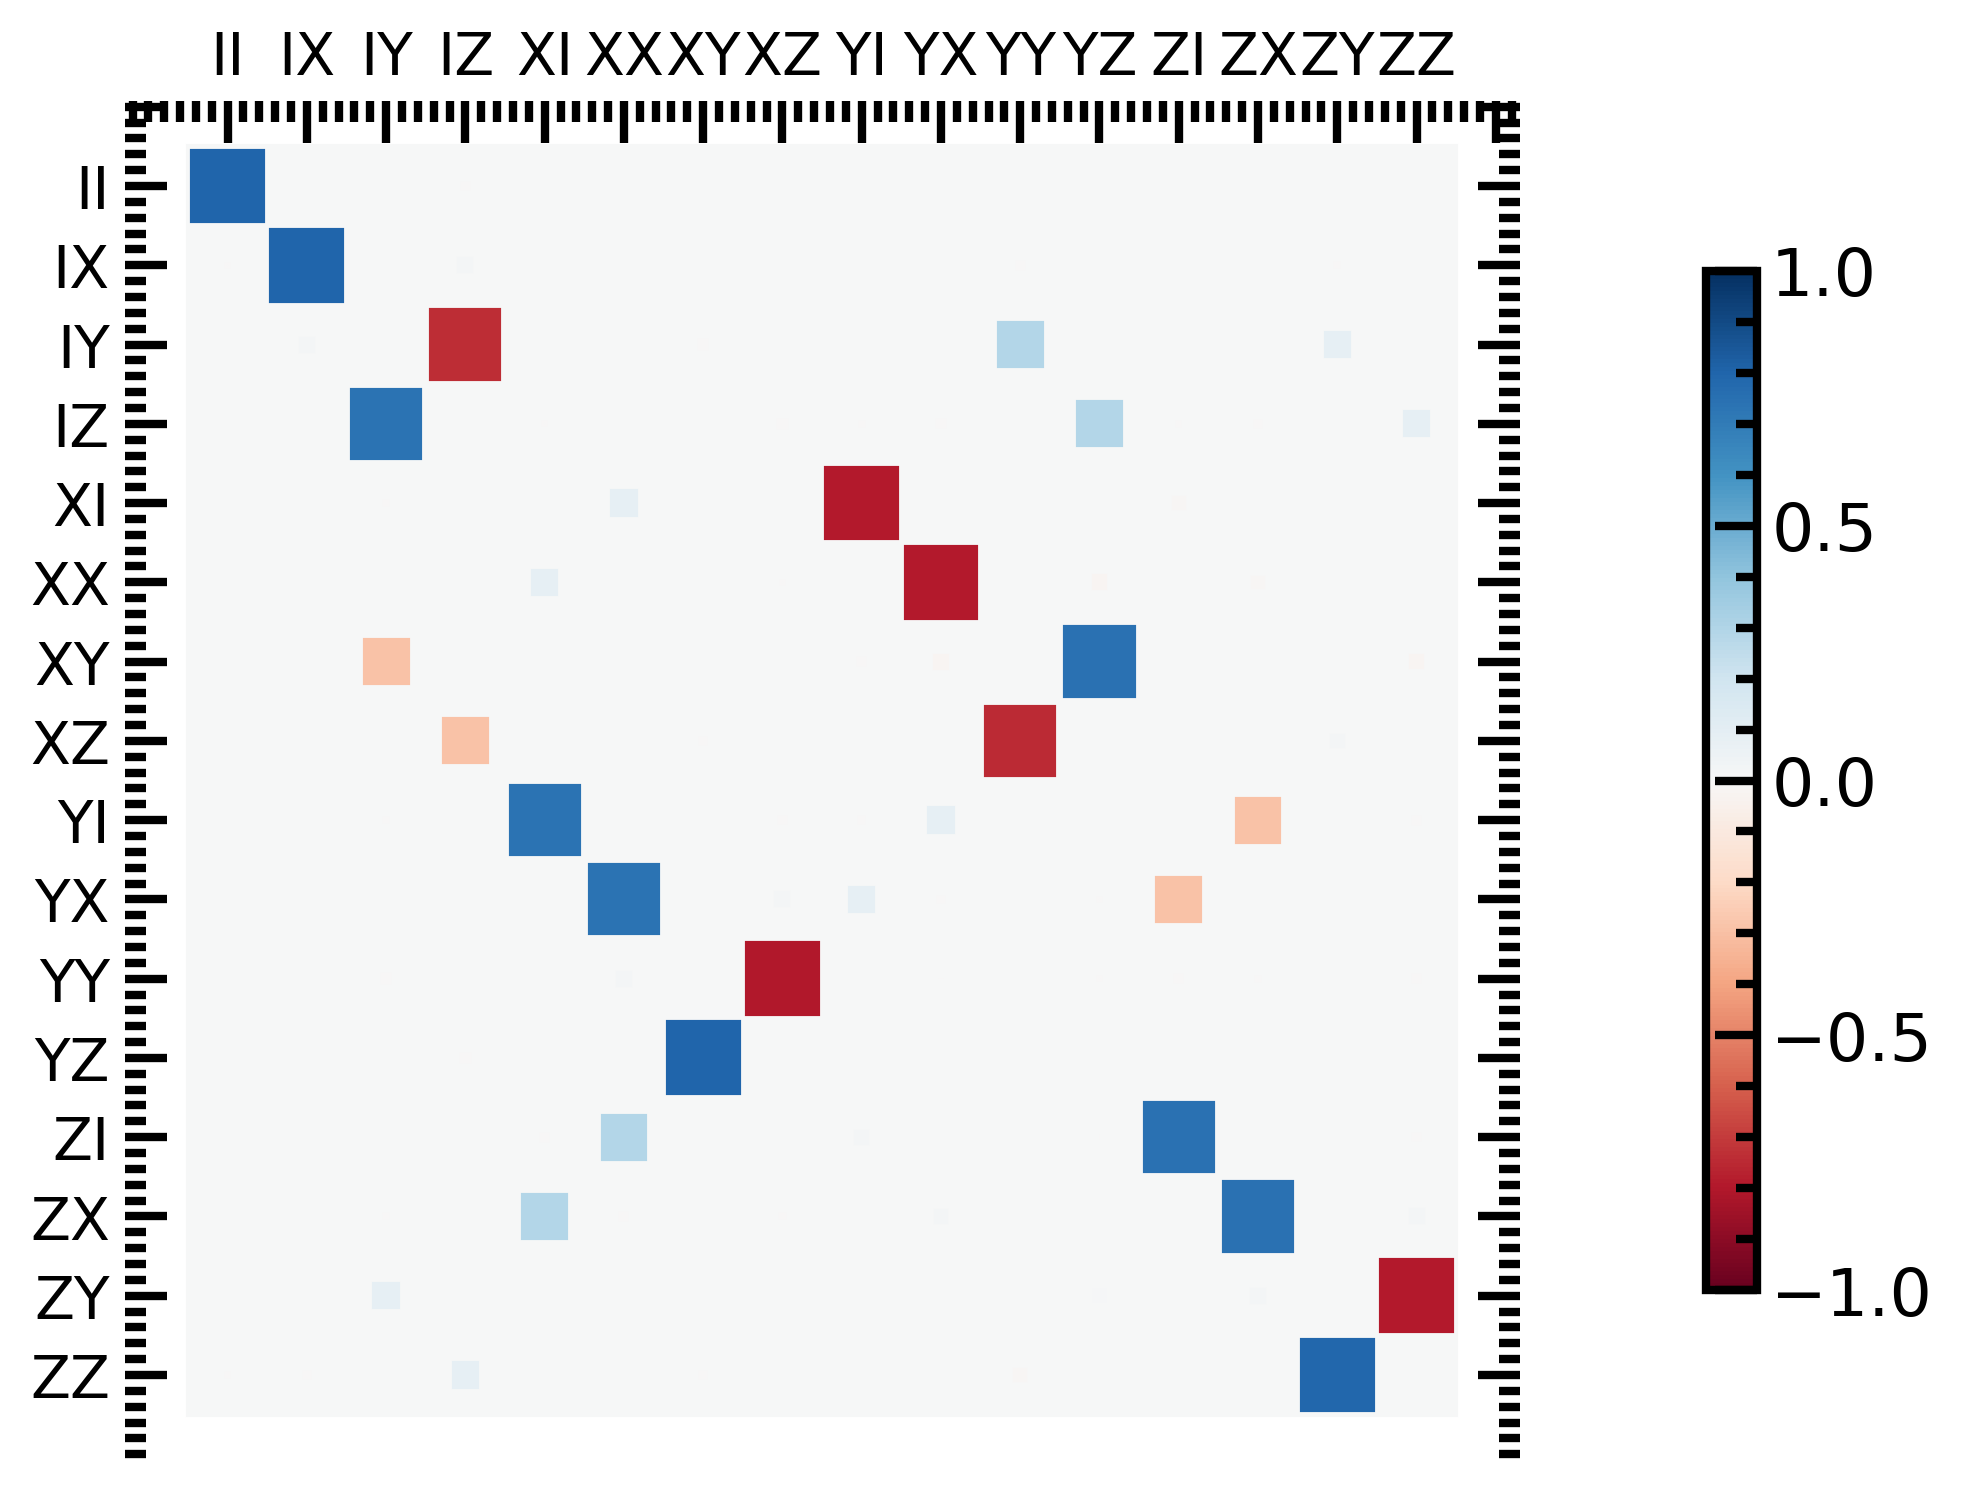

In [9]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16)) 
p_out = np.zeros((16,16)) 

gnd_state = tensor(basis(2,0), basis(2,0))
# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
# gate_op = rzx_m
U_Z2I = tensor(rz(-np.pi/2), qeye(2))
U_IX2 = tensor(qeye(2), rx(-np.pi/2))
gate_op = U_Z2I * U * U_IX2
for i, rot_i in enumerate(prep_rotations):
    for j, rot_j in enumerate(meas_rotations):
        p_in[i,j] = expect(rot_j, rot_i*gnd_state)
        p_out[i,j] = expect(rot_j, gate_op*(rot_i*gnd_state))        
ptm_ideal_2q = np.linalg.lstsq(p_in, p_out)[0]

str_primitive = ["I","X","Y","Z"]
op_label = []
for prim1 in str_primitive:
    for prim2 in str_primitive:
        op_label.append(prim1+prim2)
# print (op_label)
qutip.hinton(ptm_ideal_2q, xlabels = op_label, ylabels = op_label)


In [10]:
U_ideal = cnot()
U_real = gate_op

op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
print (fidel)

0.6294948082776726


# Optimization

## Optimize amplitude

In [441]:
T_start = 0
T_gate = 200
T_rise = 50
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
drag = False
def error(x):
    coupl = x[0]
    eta = 0
    coupl_const = coupl*1e-3*2*np.pi
    H1 = coupl_const*(XI+eta*IX)
    U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
    sx0 = expect(IX,U_t*state_00)
    sy0 = expect(IY,U_t*state_00)
    sz0 = expect(IZ,U_t*state_00)
    sx1 = expect(IX,U_t*state_10)
    sy1 = expect(IY,U_t*state_10)
    sz1 = expect(IZ,U_t*state_10)
    R = 0.5*np.sqrt((sx0-sx1)**2 + (sy0-sy1)**2+(sz0-sz1)**2)
    return 1.0 - R[-1]
    
x0 = [17] #guess
xopt = minimize(error, x0, method ='Powell', tol = None)

print ('Entanglement = ', 1.0-error(xopt.x))
print (xopt.x)

Entanglement =  0.9960880127498878
[-263.13762915]


In [78]:
def target_unitary(U):
    m11 = U.matrix_element(state_00.dag(), state_00)
    m12 = U.matrix_element(state_10.dag(), state_00)
    m21 = U.matrix_element(state_00.dag(), state_10)
    m22 = U.matrix_element(state_10.dag(), state_10)
    m33 = U.matrix_element(state_01.dag(), state_01)
    m44 = U.matrix_element(state_11.dag(), state_11)
    m34 = U.matrix_element(state_11.dag(), state_01)
    m43 = U.matrix_element(state_01.dag(), state_11)
    phi_0 = -np.angle((m11+m22+m12+m21)/(m11+m22-m12-m21))
    phi_1 = -np.angle((m33+m44+m34+m43)/(m33+m44-m34-m43))
    theta_0 = np.angle((m11+m22)*np.cos(phi_0/2)+1j*(m12+m21)*np.sin(phi_0/2))
    theta_1 = np.angle((m33+m44)*np.cos(phi_1/2)+1j*(m34+m43)*np.sin(phi_1/2))
    U_ideal = np.exp(1j*theta_0)*tensor(basis(2,0)*basis(2,0).dag(),qeye(2)) *(-1j*phi_0/2*tensor(qeye(2),sigmax())).expm() + np.exp(1j*theta_1)*tensor(basis(2,1)*basis(2,1).dag(),qeye(2)) *(-1j*phi_1/2*tensor(qeye(2),sigmax())).expm()
    return U_ideal

U_ideal = target_unitary(U_t[-1])
U_real = U_t[-1]
op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
print (fidel)

0.21908844970261918


In [438]:
U_ideal = cnot()
T_start = 0
T_gate = 200
T_rise = 50
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
drag = False


def infidelity(x):
    coupl = x[0]
    phase_op1 = x[1]
    phase_op2 = x[2]
    eta = 0
    coupl_const = coupl*1e-3*2*np.pi
    H1 = coupl_const*(XI+eta*IX)
    U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

    u00 = U_t[-1].matrix_element(state_00.dag(), state_00)
    u01 = U_t[-1].matrix_element(state_01.dag(), state_01)
    u10 = U_t[-1].matrix_element(state_10.dag(), state_10)
    u11 = U_t[-1].matrix_element(state_11.dag(), state_11)
    phase1 = np.angle(u01/u00)
    phase2 = np.angle(u10/u00)

    single_qu_z = 0
    single_qu_z = single_qu_z + state_00*state_00.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
    single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
    U = single_qu_z*U_t[-1]

#     U_Z2I = tensor(rz(-np.pi/2), qeye(2))
#     U_IX2 = tensor(qeye(2), rx(-np.pi/2))
    U_Z2I = tensor(rz(phase_op1), qeye(2))
    U_IX2 = tensor(qeye(2), rx(phase_op2))
    U_real = U_Z2I * U * U_IX2
    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
    return 1-fidel
    
# x0 = [19] #guess
x0 = [18,-np.pi/2, -np.pi/2]
xopt = minimize(infidelity, x0, method ='Powell', tol = None)
fidelity = 1.0-infidelity(xopt.x)

print ('Fidelity = ', fidelity)
print (xopt.x)

Fidelity =  0.9961184445306233
[17.81672444 -1.57086891 -1.57079635]


## Optimize with DRAG

In [76]:
U_ideal = cnot()
T_start = 0
T_gate = 200
T_rise = 40
drag = True

def infidelity(x):
    coupl = x[0]
    drag_coeff = x[1]
    delta_omega = 0
    coupl_const = coupl*1e-3*2*np.pi
    drive_freq = eig_energies[2]-eig_energies[0] + delta_omega
    H1 = coupl_const*(XI)
    U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

    u00 = U_t[-1].matrix_element(state_00, state_00)
    u01 = U_t[-1].matrix_element(state_01, state_01)
    u10 = U_t[-1].matrix_element(state_10, state_10)
    u11 = U_t[-1].matrix_element(state_11, state_11)
    phase1 = np.angle(u01/u00)
    phase2 = np.angle(u10/u00)

    single_qu_z = 0
    single_qu_z = single_qu_z + state_00*state_00.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
    single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
    U = single_qu_z*U_t[-1]

    U_Z2I = tensor(rz(-np.pi/2), qeye(2))
    U_IX2 = tensor(qeye(2), rx(-np.pi/2))
    U_real = U_Z2I * U * U_IX2
    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
    return 1-fidel
    
x0 = [18,0] #guess
xopt = minimize(infidelity, x0, method ='Powell', tol = 1e-7)
fidelity = 1.0-infidelity(xopt.x)

print ('Fidelity = ', fidelity)
print (xopt.x)

Fidelity =  0.9955963580480841
[1.65685454e+01 9.78969261e-03]


## Optimize with DRAG + detuning

In [58]:
T_start = 0
T_gate = 100
T_rise = 20
drag = True

def infidelity(x):
    coupl = x[0]
    drag_coeff = x[1]
    delta_omega = x[2]
    coupl_const = coupl*1e-3*2*np.pi
    drive_freq = eig_energies[2]-eig_energies[0] + delta_omega
    H1 = coupl_const*(XI)
    U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

    u00 = U_t[-1].matrix_element(state_00, state_00)
    u01 = U_t[-1].matrix_element(state_01, state_01)
    u10 = U_t[-1].matrix_element(state_10, state_10)
    u11 = U_t[-1].matrix_element(state_11, state_11)
    phase1 = np.angle(u01/u00)
    phase2 = np.angle(u10/u00)

    single_qu_z = 0
    single_qu_z = single_qu_z + state_00*state_00.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
    single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
    U = single_qu_z*U_t[-1]

    U_Z2I = tensor(rz(-np.pi/2), qeye(2))
    U_IX2 = tensor(qeye(2), rx(-np.pi/2))
    U_real = U_Z2I * U * U_IX2
    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
    return 1-fidel
    
x0 = [45,0,0] #guess
xopt = minimize(infidelity, x0, method ='Powell', tol = 1e-7)
fidelity = 1.0-infidelity(xopt.x)

print ('Fidelity = ', fidelity)
print (xopt.x)

Fidelity =  0.993892654388717
[ 4.14045074e+01 -7.03628912e-02  6.84980367e-05]


## Optimize with pulse rise time

In [104]:
T_start = 0
T_gate = 200
drag = False
drag_coeff = 0
def infidelity(x):
    coupl = x[0]
    T_rise = x[1]
    delta_omega = 0
    coupl_const = coupl*1e-3*2*np.pi
    drive_freq = eig_energies[2]-eig_energies[0] + delta_omega
    H1 = coupl_const*(XI)
    U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

    u00 = U_t[-1].matrix_element(state_00, state_00)
    u01 = U_t[-1].matrix_element(state_01, state_01)
    u10 = U_t[-1].matrix_element(state_10, state_10)
    u11 = U_t[-1].matrix_element(state_11, state_11)
    phase1 = np.angle(u01/u00)
    phase2 = np.angle(u10/u00)

    single_qu_z = 0
    single_qu_z = single_qu_z + state_00*state_00.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
    single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
    U = single_qu_z*U_t[-1]

    U_Z2I = tensor(rz(-np.pi/2), qeye(2))
    U_IX2 = tensor(qeye(2), rx(-np.pi/2))
    U_real = U_Z2I * U * U_IX2
    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
    return 1-fidel
    
x0 = [18,40] #guess
xopt = minimize(infidelity, x0, method ='Powell', tol = 1e-7)
fidelity = 1.0-infidelity(xopt.x)

print ('Fidelity = ', fidelity)
print (xopt.x)

Fidelity =  0.9991171794374238
[28.64645429 15.90019294]


## Optimize with DRAG + rise time

In [78]:
T_start = 0
T_gate = 200
drag = True

def infidelity(x):
    coupl = x[0]
    T_rise = x[1]
    drag_coeff = x[2]
    delta_omega = 0
    coupl_const = coupl*1e-3*2*np.pi
    drive_freq = eig_energies[2]-eig_energies[0] + delta_omega
    H1 = coupl_const*(XI)
    U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

    u00 = U_t[-1].matrix_element(state_00, state_00)
    u01 = U_t[-1].matrix_element(state_01, state_01)
    u10 = U_t[-1].matrix_element(state_10, state_10)
    u11 = U_t[-1].matrix_element(state_11, state_11)
    phase1 = np.angle(u01/u00)
    phase2 = np.angle(u10/u00)

    single_qu_z = 0
    single_qu_z = single_qu_z + state_00*state_00.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
    single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
    single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
    U = single_qu_z*U_t[-1]

    U_Z2I = tensor(rz(-np.pi/2), qeye(2))
    U_IX2 = tensor(qeye(2), rx(-np.pi/2))
    U_real = U_Z2I * U * U_IX2
    op1 = U_real.dag() * U_real
    op2 = U_real * U_ideal.dag()
    fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
    return 1-fidel
    
x0 = [18,40,0] #guess
xopt = minimize(infidelity, x0, method ='Powell', tol = 1e-7)
fidelity = 1.0-infidelity(xopt.x)

print ('Fidelity = ', fidelity)
print (xopt.x)

Fidelity =  0.9962924113097487
[18.03238608 51.58998296  0.05824822]


# Sweep parameters

In [151]:
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/HCF paper/'

## Sweep amplitude, find gate rate

In [205]:
#Qubit frequency
w1 = 0.45
w2 = 0.5

J = 0.005 #GHz
H0 = two_q_hamiltonian(w1, w2, J)
eig_energies, eig_states = H0.eigenstates()

state_00 = eig_states[0]
state_01 = eig_states[2]
state_10 = eig_states[1]
state_11 = eig_states[3]

#Gate parameters
drive_freq = eig_energies[2]-eig_energies[0]
T_start = 0
T_gate = 1000
shape = 'square'
drag = False
t_points = np.linspace(0,T_gate, 10*int(T_gate)+1)
coupl_array = np.linspace(5,100,96)
sz = np.zeros((len(t_points), len(coupl_array)))

for idx, coupl in enumerate(coupl_array):
    coupl_const = coupl*1e-3*2*np.pi
    H1 = coupl_const*(XI) #Driving first qubit only
    U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points = t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
            T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
    sz[:,idx] = (expect(IZ,U_t*state_00))

In [262]:
def cosine_func(x,amp,freq,c1,c2):
    return amp*np.cos(2*np.pi*freq*(x-c1))+c2

coupl_array = np.linspace(5,100,96)
gate_rate = np.zeros_like(coupl_array)
fit_error = np.zeros_like(coupl_array)
guess =[1,0.0005,0,0]

# opt,cov = curve_fit(cosine_func, xdata = t_points, ydata = sz[:,0], p0=guess)
# plt.plot(t_points,sz[:,0])
# plt.plot(t_points,cosine_func(t_points, *opt))

for idx, coupl in enumerate(coupl_array):
    if idx ==0:
        freq_guess = 0.001
    else:
        freq_guess = gate_rate[idx-1]
    guess =[1,freq_guess,0,0]
    opt,cov = curve_fit(cosine_func, xdata = t_points, ydata = sz[:,idx], p0=guess)
    gate_rate[idx] = opt[1]
    fit_error[idx] = np.sqrt(np.diag(cov))[1]
coupl_array = np.insert(coupl_array,0,0) 
gate_rate=np.insert(gate_rate,0,0) 
np.save(figpath+'/CR_amp_vs_rate_TLS.npy',gate_rate)

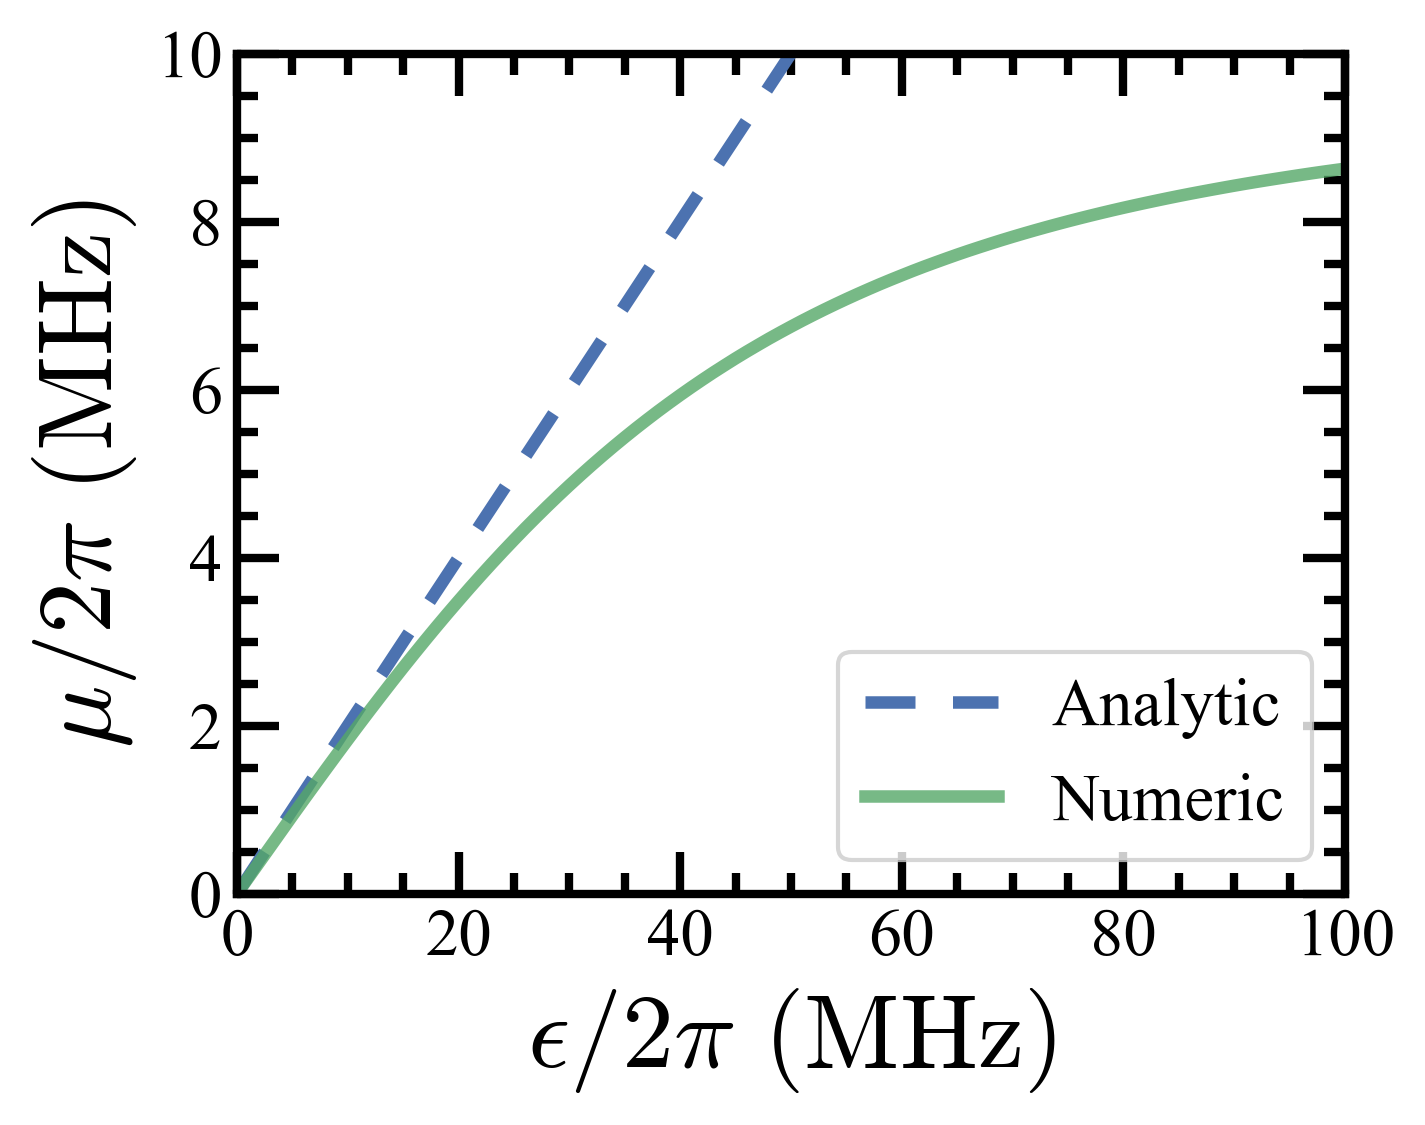

In [264]:
gate_rate = np.load(figpath+'/CR_amp_vs_rate_TLS.npy')
plt.figure(figsize = [5,4])
plt.plot(coupl_array, coupl_array*J*1e3*2/50,'--', label = 'Analytic')
plt.plot(coupl_array,gate_rate*1e3*2, label = 'Numeric',alpha = 0.8)   
plt.xlabel(r'$\epsilon/2\pi~(\mathrm{MHz})$')
plt.ylabel(r'$\mu/2\pi~(\mathrm{MHz})$')
plt.ylim([0,10])
plt.xlim([0,100])
plt.tight_layout()
plt.legend()
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
figname = 'CR_gate1.pdf'
plt.savefig(figpath+figname)

## Sweep detuning, find gate rate

In [265]:
#Qubit frequency
w1 = 0.45
w2 = 0.5
J = 0.005 #GHz

#Gate parameters
T_start = 0
T_gate = 5000
shape = 'square'
drag = False
coupl = 50
coupl_const = coupl*1e-3*2*np.pi
H1 = coupl_const*(XI) #Driving first qubit only
t_points = np.linspace(0,T_gate, 4*int(T_gate)+1)
detune_array = np.linspace(0.02,0.2,181)
sz = np.zeros((len(t_points), len(detune_array)))

for idx, detune in enumerate(detune_array):
    w1 = w2 - detune
    H0 = two_q_hamiltonian(w1, w2, J)
    eig_energies, eig_states = H0.eigenstates()
    drive_freq = eig_energies[2]-eig_energies[0]
    state_00 = eig_states[0]
    state_01 = eig_states[2]
    state_10 = eig_states[1]
    state_11 = eig_states[3]
    U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points = t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
            T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
    sz[:,idx] = (expect(IZ,U_t*state_00))

In [315]:
def cosine_func(x,amp,freq,c1,c2):
    return amp*np.cos(2*np.pi*freq*(x-c1))+c2

detune_array = np.linspace(0.02,0.2,181)
gate_rate = np.zeros_like(detune_array)

# guess =[1,0.0046,0,0]
# opt,cov = curve_fit(cosine_func, xdata = t_points, ydata = sz[:,0], p0=guess)
# plt.plot(t_points,sz[:,0])
# plt.plot(t_points,cosine_func(t_points, *opt))

for idx in range(len(detune_array)):
    if idx == 0:
        freq_guess = 0.0046
    else:
        freq_guess = gate_rate[idx-1]
    
    guess =[1,freq_guess,0,0]
    opt,cov = curve_fit(cosine_func, xdata = t_points, ydata = sz[:,idx], p0=guess)
    gate_rate[idx] = opt[1]
np.save(figpath+'/CR_detune_vs_rate_TLS.npy',gate_rate)

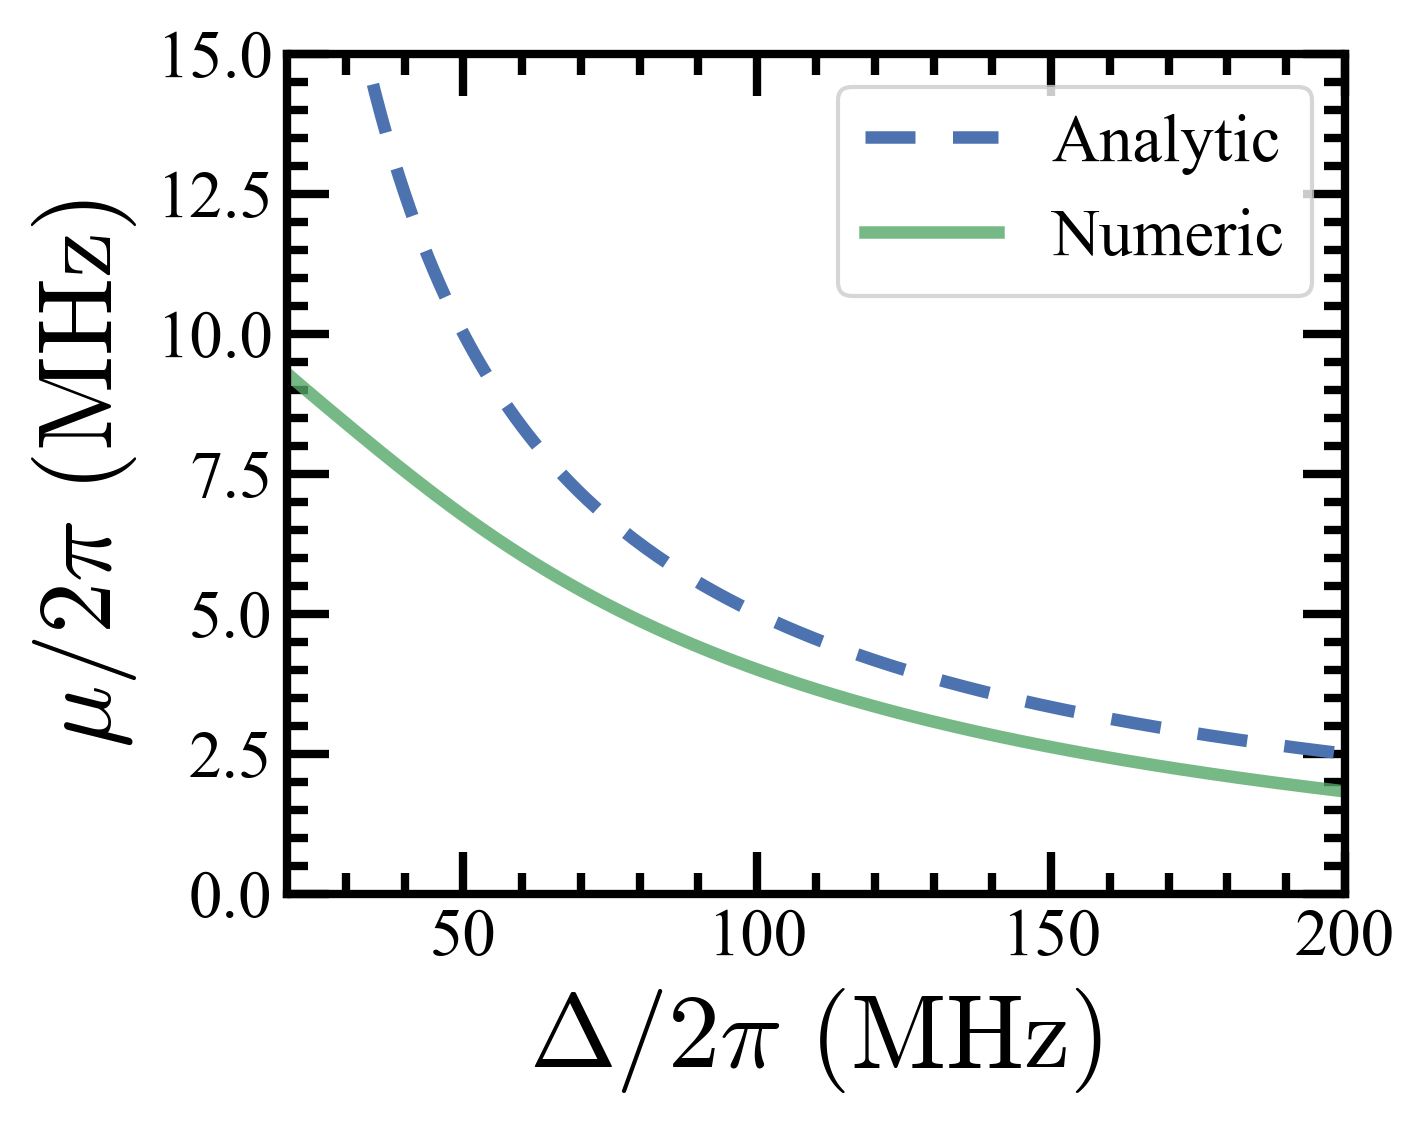

In [321]:
gate_rate = np.load(figpath+'/CR_detune_vs_rate_TLS.npy')
plt.figure(figsize = [5,4])
plt.plot(detune_array*1e3, coupl*J*1e3*2/(detune_array*1e3),'--', label = 'Analytic')
plt.plot(detune_array*1e3, gate_rate*1e3*2, label = 'Numeric',alpha = 0.8)   
plt.xlabel(r'$\Delta/2\pi~(\mathrm{MHz})$')
plt.ylabel(r'$\mu/2\pi~(\mathrm{MHz})$')
plt.ylim([0,15])
plt.xlim([20,200])
plt.tight_layout()
plt.legend()
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
figname = 'CR_gate2.pdf'
plt.savefig(figpath+figname)

## Sweep rise time, find optimal drive amplitude

In [348]:
#Qubit frequency
w1 = 0.45
w2 = 0.5

J = 0.005 #GHz
H0 = two_q_hamiltonian(w1, w2, J)
eig_energies, eig_states = H0.eigenstates()

state_00 = eig_states[0]
state_01 = eig_states[2]
state_10 = eig_states[1]
state_11 = eig_states[3]

#Gate parameters
drive_freq = eig_energies[2]-eig_energies[0]
shape = 'cosflattop'
drag = False
T_start = 0


T_gate_array = np.linspace(100,300,101)
T_rise_array = np.linspace(25,50,6)
amp_opt = np.zeros((len(T_rise_array), len(T_gate_array)))
infidel = np.zeros((len(T_rise_array), len(T_gate_array)))
U_ideal = cnot()

for idx, T_rise in enumerate(T_rise_array):
    for idy, T_gate in enumerate(T_gate_array):
        t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
        
        def infidelity(x):
            coupl = x[0]
            coupl_const = coupl*1e-3*2*np.pi
            H1 = coupl_const*(XI)
            U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

            u00 = U_t[-1].matrix_element(state_00, state_00)
            u01 = U_t[-1].matrix_element(state_01, state_01)
            u10 = U_t[-1].matrix_element(state_10, state_10)
            u11 = U_t[-1].matrix_element(state_11, state_11)
            phase1 = np.angle(u01/u00)
            phase2 = np.angle(u10/u00)

            single_qu_z = 0
            single_qu_z = single_qu_z + state_00*state_00.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
            single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
            U = single_qu_z*U_t[-1]

            U_Z2I = tensor(rz(-np.pi/2), qeye(2))
            U_IX2 = tensor(qeye(2), rx(-np.pi/2))
            U_real = U_Z2I * U * U_IX2

            op1 = U_real.dag() * U_real
            op2 = U_real * U_ideal.dag()
            fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
            return 1-fidel
        coupl_guess = 10*100/T_gate
        x0 = [coupl_guess] #guess
        xopt = minimize(infidelity, x0, method ='Powell', tol = None)
        infidel[idx,idy] = infidelity(xopt.x)
        amp_opt[idx,idy] = xopt.x[0]
np.save(figpath+'/CR_amp_vs_tau_TLS.npy',amp_opt)

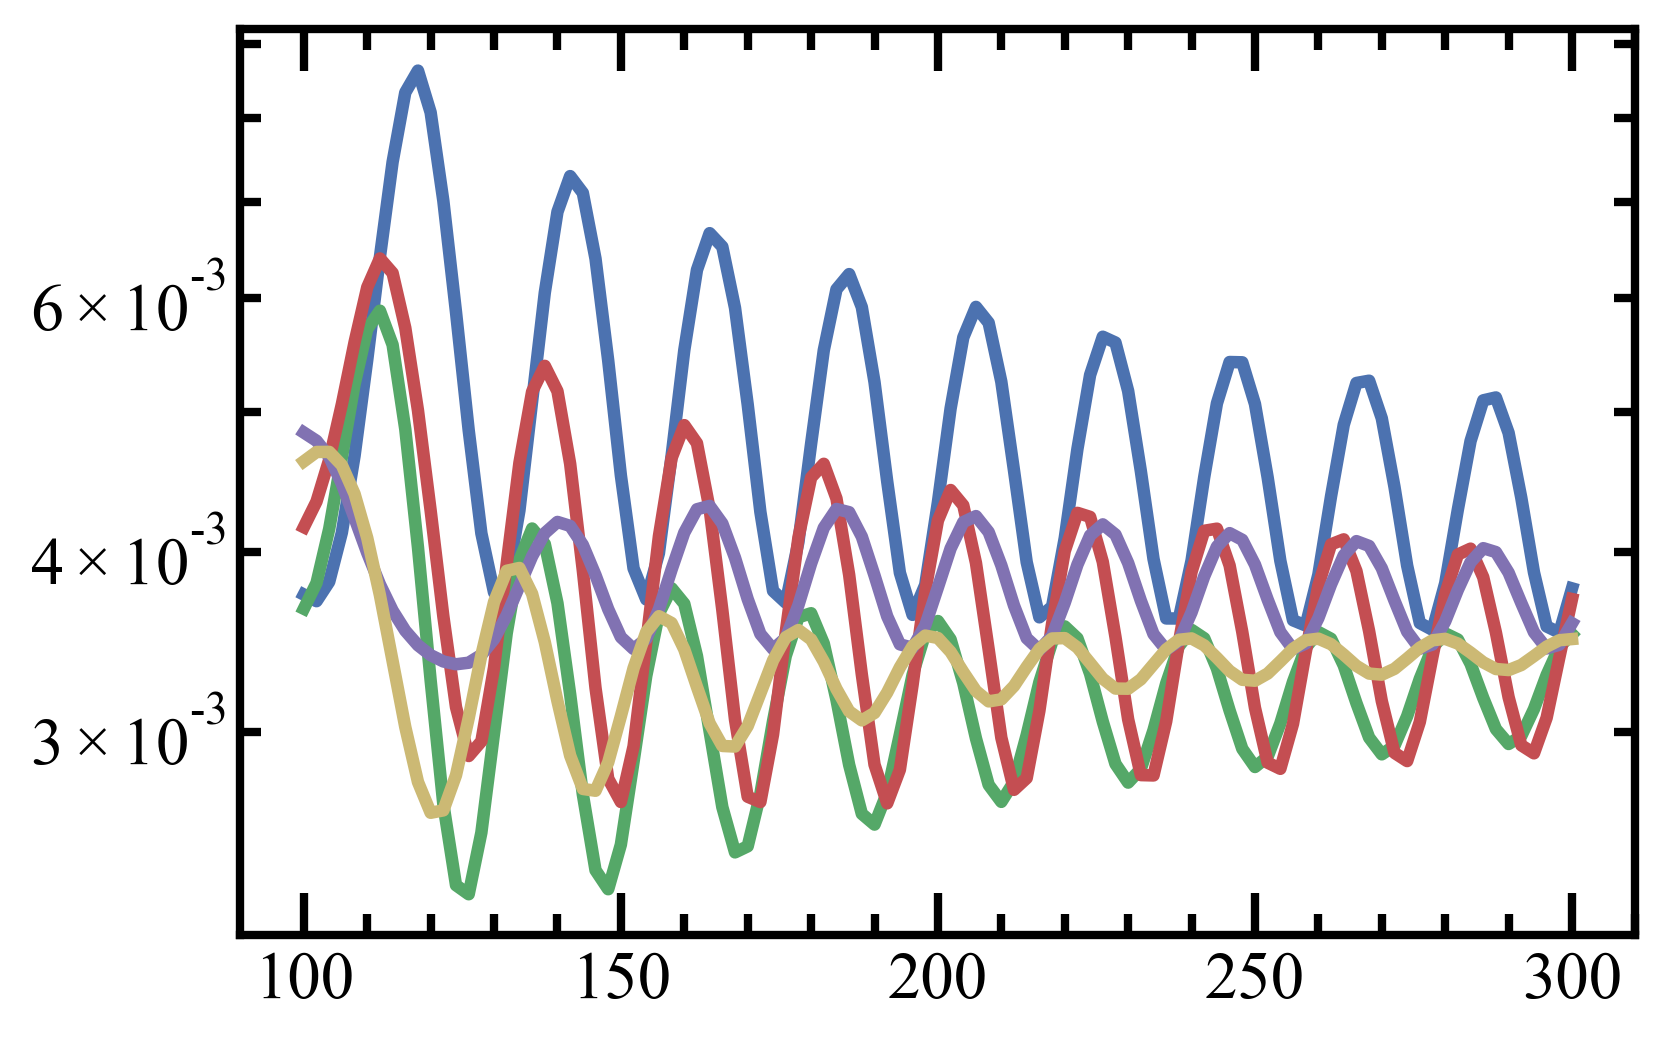

In [452]:
for idx in range (5):
    plt.plot(T_gate_array, infidel[idx,:])
plt.yscale("log")


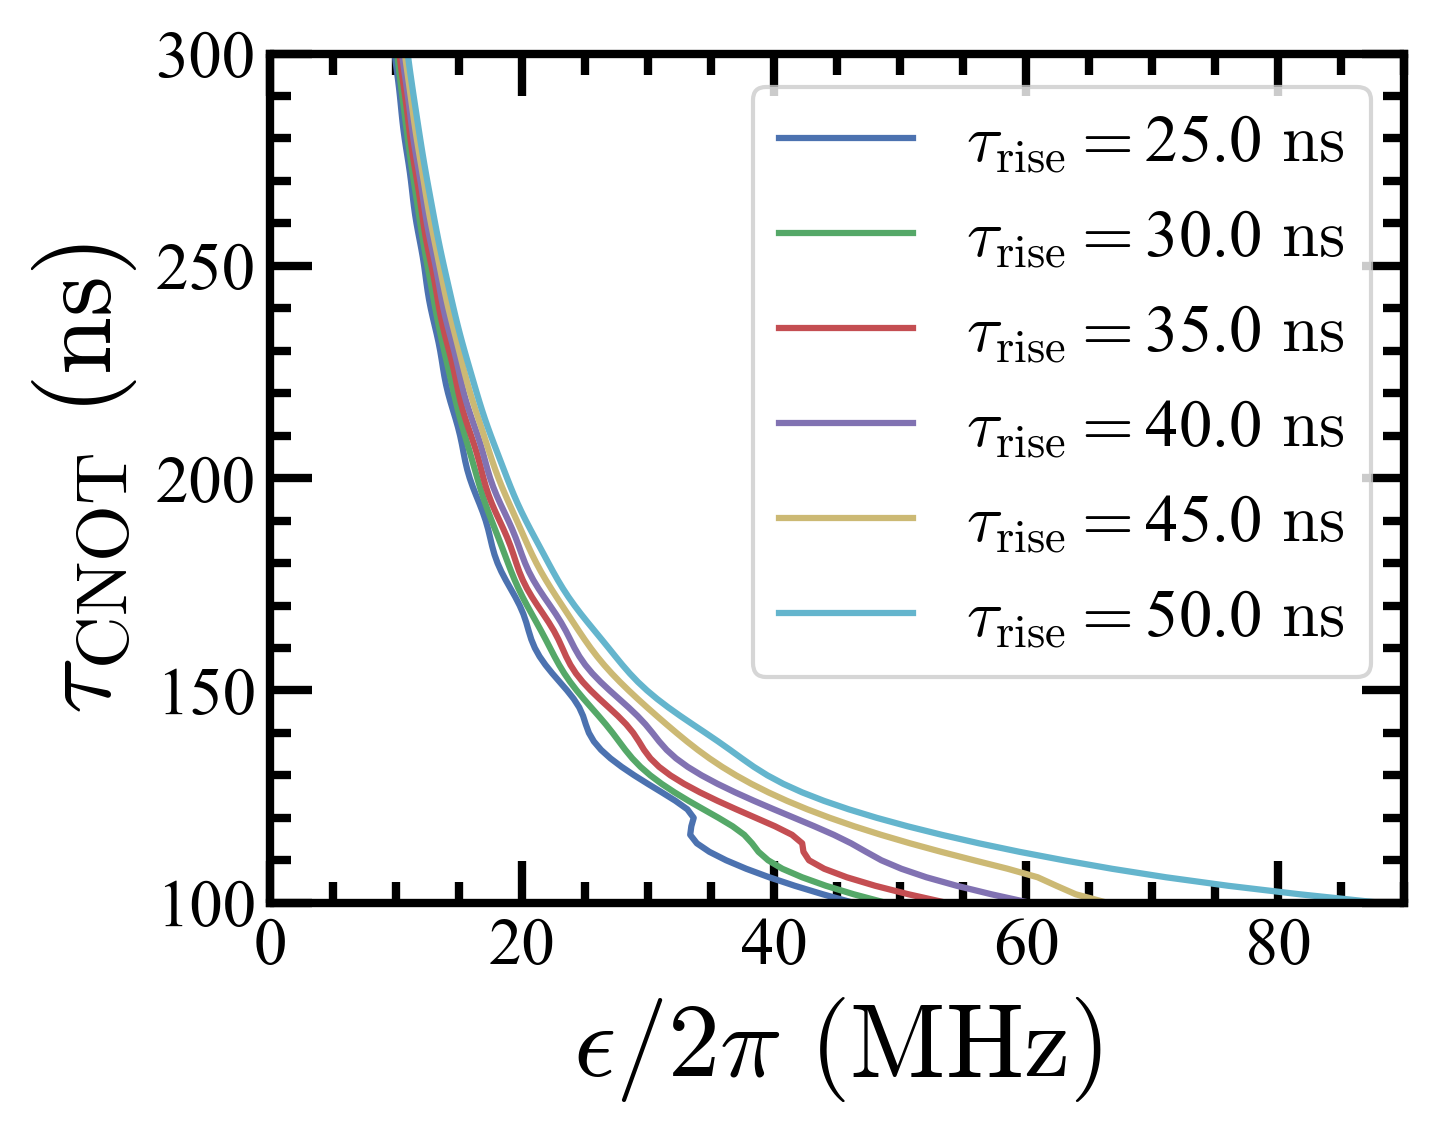

In [349]:
T_gate_array = np.linspace(100,300,101)
T_rise_array = np.linspace(25,50,6)
plt.figure(figsize=[5,4])
for idx in range (6):
    txtstring = r'$\tau_\mathrm{rise} =$' + str(T_rise_array[idx])+r'$~\mathrm{ns}$'
    plt.plot(amp_opt[idx,:], T_gate_array, linewidth = 1.5, label = txtstring)
plt.xlim([0,90])
plt.ylim([100,300])
plt.ylabel(r'$\tau_\mathrm{CNOT}~(\mathrm{ns})$')
plt.xlabel(r'$\epsilon/2\pi~(\mathrm{MHz})$')
# plt.text(amp_opt[-1,0]-30,T_gate_array[0]+15,r'$\tau_\mathrm{rise} = 50~\mathrm{ns}$')
# plt.text(amp_opt[0,0]-38,T_gate_array[0]+15,r'$\tau_\mathrm{rise} = 25~\mathrm{ns}$')
plt.legend()
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
plt.tight_layout()
figname = 'CR_gate3.pdf'
plt.savefig(figpath+figname)

## Sweep coupling strength, find optimal drive amplitude

In [110]:
#Qubit frequency
w1 = 0.45
w2 = 0.5

#Gate parameters
shape = 'cosflattop'
drag = False
T_start = 0
T_gate_array = np.linspace(100,300,101)
T_rise_array = 50

J_array = np.linspace(2,10,5)*1e-3
amp_opt = np.zeros((len(J_array), len(T_gate_array)))
infidel = np.zeros((len(J_array), len(T_gate_array)))
U_ideal = cnot()

for idx, J in enumerate(J_array):
    H0 = two_q_hamiltonian(w1, w2, J)
    eig_energies, eig_states = H0.eigenstates()
    state_00 = eig_states[0]
    state_01 = eig_states[2]
    state_10 = eig_states[1]
    state_11 = eig_states[3]
    drive_freq = eig_energies[2]-eig_energies[0]
    for idy, T_gate in enumerate(T_gate_array):
        t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
        def infidelity(x):
            coupl = x[0]
            coupl_const = coupl*1e-3*2*np.pi
            H1 = coupl_const*(XI)
            U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

            u00 = U_t[-1].matrix_element(state_00, state_00)
            u01 = U_t[-1].matrix_element(state_01, state_01)
            u10 = U_t[-1].matrix_element(state_10, state_10)
            u11 = U_t[-1].matrix_element(state_11, state_11)
            phase1 = np.angle(u01/u00)
            phase2 = np.angle(u10/u00)

            single_qu_z = 0
            single_qu_z = single_qu_z + state_00*state_00.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
            single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
            U = single_qu_z*U_t[-1]

            U_Z2I = tensor(rz(-np.pi/2), qeye(2))
            U_IX2 = tensor(qeye(2), rx(-np.pi/2))
            U_real = U_Z2I * U * U_IX2

            op1 = U_real.dag() * U_real
            op2 = U_real * U_ideal.dag()
            fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
            return 1-fidel
        if idy == 0:
            coupl_guess = 200
        else:
            coupl_guess = amp_opt[idx,idy-1]
        x0 = [coupl_guess] #guess
        xopt = minimize(infidelity, x0, method ='Powell', tol = None)
        infidel[idx,idy] = infidelity(xopt.x)
        amp_opt[idx,idy] = xopt.x[0]

In [152]:
np.save(figpath+'/CR_coupling_vs_gatetime_TLS.npy',amp_opt)

In [153]:
#Qubit frequency
w1 = 0.45
w2 = 0.5

#Gate parameters
shape = 'cosflattop'
drag = False
T_start = 0
T_gate_array = np.linspace(150,300,76)
T_rise_array = 50

J_array = np.linspace(2,2,1)*1e-3
amp_opt = np.zeros((len(J_array), len(T_gate_array)))
infidel = np.zeros((len(J_array), len(T_gate_array)))
U_ideal = cnot()

for idx, J in enumerate(J_array):
    H0 = two_q_hamiltonian(w1, w2, J)
    eig_energies, eig_states = H0.eigenstates()
    state_00 = eig_states[0]
    state_01 = eig_states[2]
    state_10 = eig_states[1]
    state_11 = eig_states[3]
    drive_freq = eig_energies[2]-eig_energies[0]
    for idy, T_gate in enumerate(T_gate_array):
        t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)
        def infidelity(x):
            coupl = x[0]
            coupl_const = coupl*1e-3*2*np.pi
            H1 = coupl_const*(XI)
            U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)

            u00 = U_t[-1].matrix_element(state_00, state_00)
            u01 = U_t[-1].matrix_element(state_01, state_01)
            u10 = U_t[-1].matrix_element(state_10, state_10)
            u11 = U_t[-1].matrix_element(state_11, state_11)
            phase1 = np.angle(u01/u00)
            phase2 = np.angle(u10/u00)

            single_qu_z = 0
            single_qu_z = single_qu_z + state_00*state_00.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
            single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
            U = single_qu_z*U_t[-1]

            U_Z2I = tensor(rz(-np.pi/2), qeye(2))
            U_IX2 = tensor(qeye(2), rx(-np.pi/2))
            U_real = U_Z2I * U * U_IX2

            op1 = U_real.dag() * U_real
            op2 = U_real * U_ideal.dag()
            fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
            return 1-fidel
        if idy == 0:
            coupl_guess = 200
        else:
            coupl_guess = amp_opt[idx,idy-1]
        x0 = [coupl_guess] #guess
        xopt = minimize(infidelity, x0, method ='Powell', tol = None)
        infidel[idx,idy] = infidelity(xopt.x)
        amp_opt[idx,idy] = xopt.x[0]
np.save(figpath+'/CR_coupling_vs_gatetime_TLS_1.npy',amp_opt)

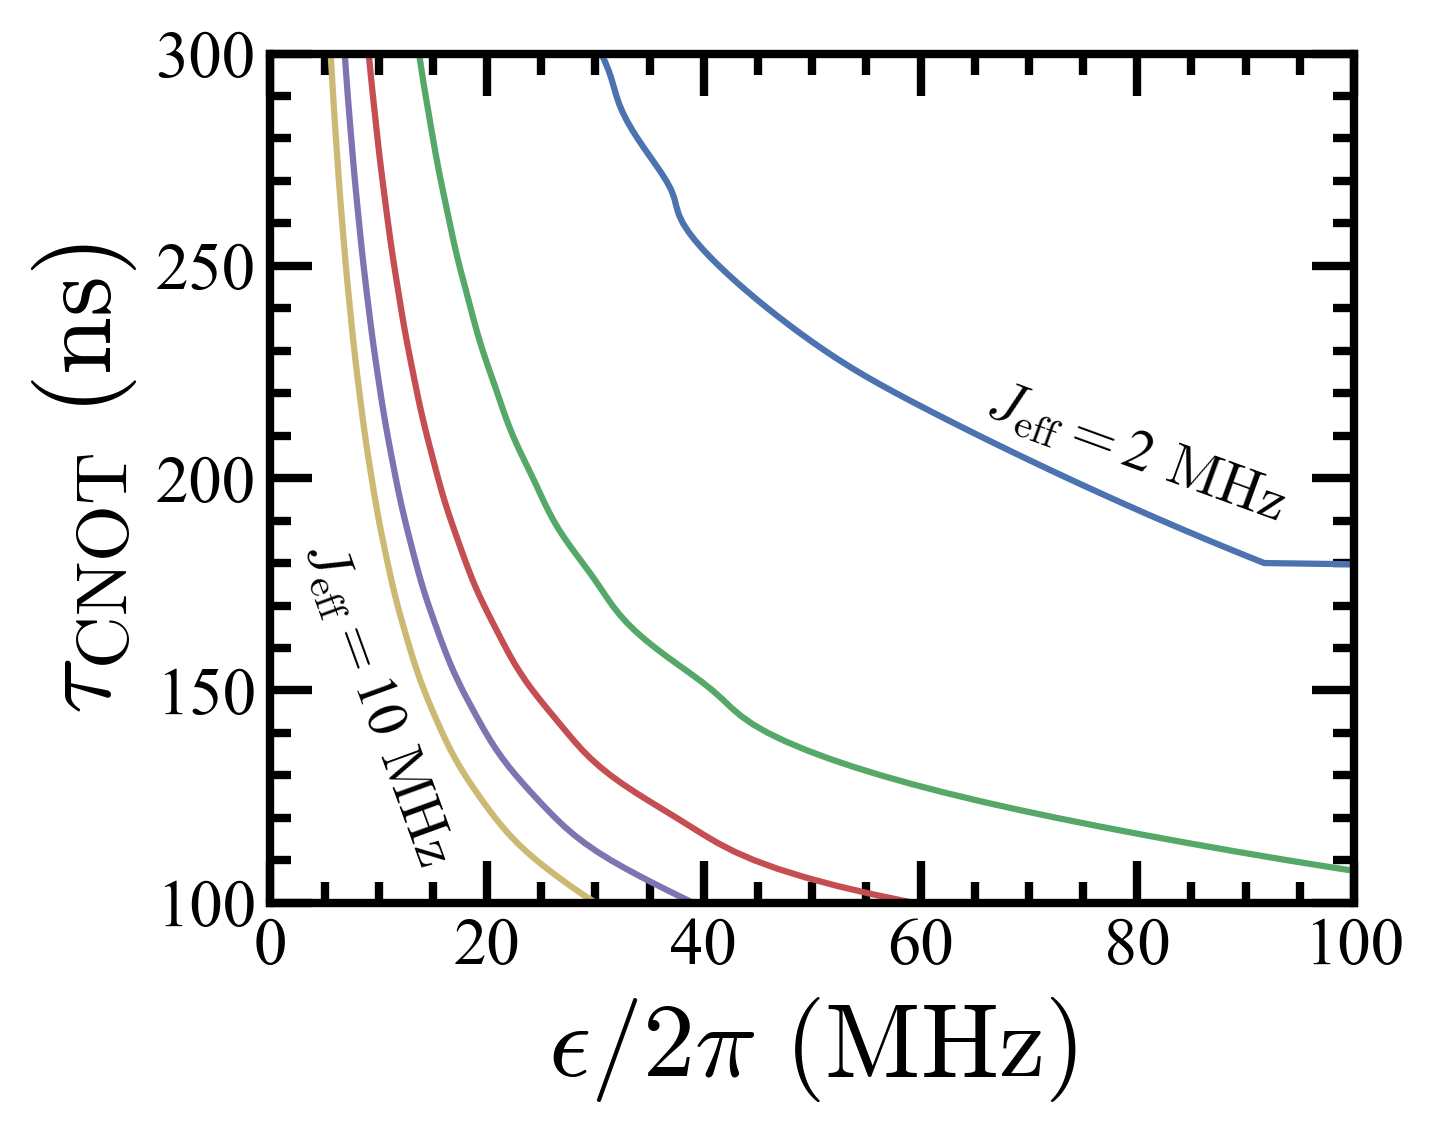

In [346]:
plt.figure(figsize=[5,4])
amp_opt = np.load(figpath+'/CR_coupling_vs_gatetime_TLS_1.npy')
T_gate_array = np.linspace(150,300,76)
txtstring = r'$J_\mathrm{eff} =$' + str(2)+r'$~\mathrm{MHz}$'
plt.plot(amp_opt[0,:], T_gate_array, linewidth = 1.5)
plt.text(amp_opt[0,30],T_gate_array[-1]-110,txtstring, rotation=-20)

amp_opt = np.load(figpath+'/CR_coupling_vs_gatetime_TLS.npy')
J_array = np.linspace(2,10,5)*1e-3
T_gate_array = np.linspace(100,300,101)
for idx in range (1,len(J_array)):
    txtstring = r'$J_\mathrm{eff} =$' + str(int(J_array[idx]*1e3))+r'$~\mathrm{MHz}$'
    plt.plot(amp_opt[idx,:], T_gate_array, linewidth = 1.5)
    
txtstring = r'$J_\mathrm{eff} =$' + str(int(J_array[idx]*1e3))+r'$~\mathrm{MHz}$'
plt.text(2,110,txtstring, rotation=-70)


plt.xlim([0,100])
plt.ylim([100,300])
plt.ylabel(r'$\tau_\mathrm{CNOT}~ (\mathrm{ns})$')
plt.xlabel(r'$\epsilon/2\pi~ (\mathrm{MHz})$')
# plt.text(amp_opt[-1,0]-30,T_gate_array[0]+15,r'$\tau_\mathrm{rise} = 50~\mathrm{ns}$')
# plt.text(amp_opt[0,0]-38,T_gate_array[0]+15,r'$\tau_\mathrm{rise} = 25~\mathrm{ns}$')
# plt.legend()
plt.tight_layout()
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
figname = 'CR_gate5.pdf'
plt.savefig(figpath+figname)

In [ ]:
1

## Sweep detuning, find fidelity, vary gate time

In [16]:
#Gate parameters to sweep
detuning_array = np.linspace(50,250,51)*1e-3
T_gate_array = np.linspace(100,300,3)

#Qubit frequency
w1 = 0.4
J = 0.005 #GHz
shape = 'cosflattop'
infidelity_array = np.zeros((len(detuning_array),len(T_gate_array)))
coupl_const_array = np.zeros((len(detuning_array),len(T_gate_array)))
U_ideal = cnot()
T_start = 0
T_rise = 50

for t_idx, T_gate in enumerate(T_gate_array):
    t_points = np.linspace(0, T_gate, 2*int(T_gate)+1)
    
    for d_idx, detuning in enumerate (detuning_array):
        w2 = w1 + detuning
        H0 = two_q_hamiltonian(w1, w2, J)
        eig_energies, eig_states = H0.eigenstates()

        state_00 = eig_states[0]
        state_01 = eig_states[2]
        state_10 = eig_states[1]
        state_11 = eig_states[3]
        drive_freq = eig_energies[2] - eig_energies[0]
        def infidelity(x):
            coupl = x[0]
            drive_freq = eig_energies[2]-eig_energies[0]
            coupl_const = coupl*1e-3*2*np.pi
            H1 = coupl_const*(XI)
            U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
            u00 = U_t[-1].matrix_element(state_00, state_00)
            u01 = U_t[-1].matrix_element(state_01, state_01)
            u10 = U_t[-1].matrix_element(state_10, state_10)
            u11 = U_t[-1].matrix_element(state_11, state_11)
            phase1 = np.angle(u01/u00)
            phase2 = np.angle(u10/u00)

            single_qu_z = 0
            single_qu_z = single_qu_z + state_00*state_00.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
            single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
            U = single_qu_z*U_t[-1]

            U_Z2I = tensor(rz(-np.pi/2), qeye(2))
            U_IX2 = tensor(qeye(2), rx(-np.pi/2))
            U_real = U_Z2I * U * U_IX2
            op1 = U_real.dag() * U_real
            op2 = U_real * U_ideal.dag()
            fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
            return 1-fidel
        if d_idx == 0:
            coupl_guess = detuning*1e3*2 /(T_gate/100)
        else:
            coupl_guess = coupl_const_array[d_idx-1,t_idx]
        x0 = [coupl_guess] #guess
        xopt = minimize(infidelity, x0, method ='Powell', tol = 1e-8)
        coupl_const_array[d_idx, t_idx] = xopt.x[0]
        infidelity_array [d_idx, t_idx] = infidelity(xopt.x)

In [496]:
#Save data here
np.save(figpath+'/CR_detune_vs_fidelity_variedtau_TLS.npy',infidelity_array)

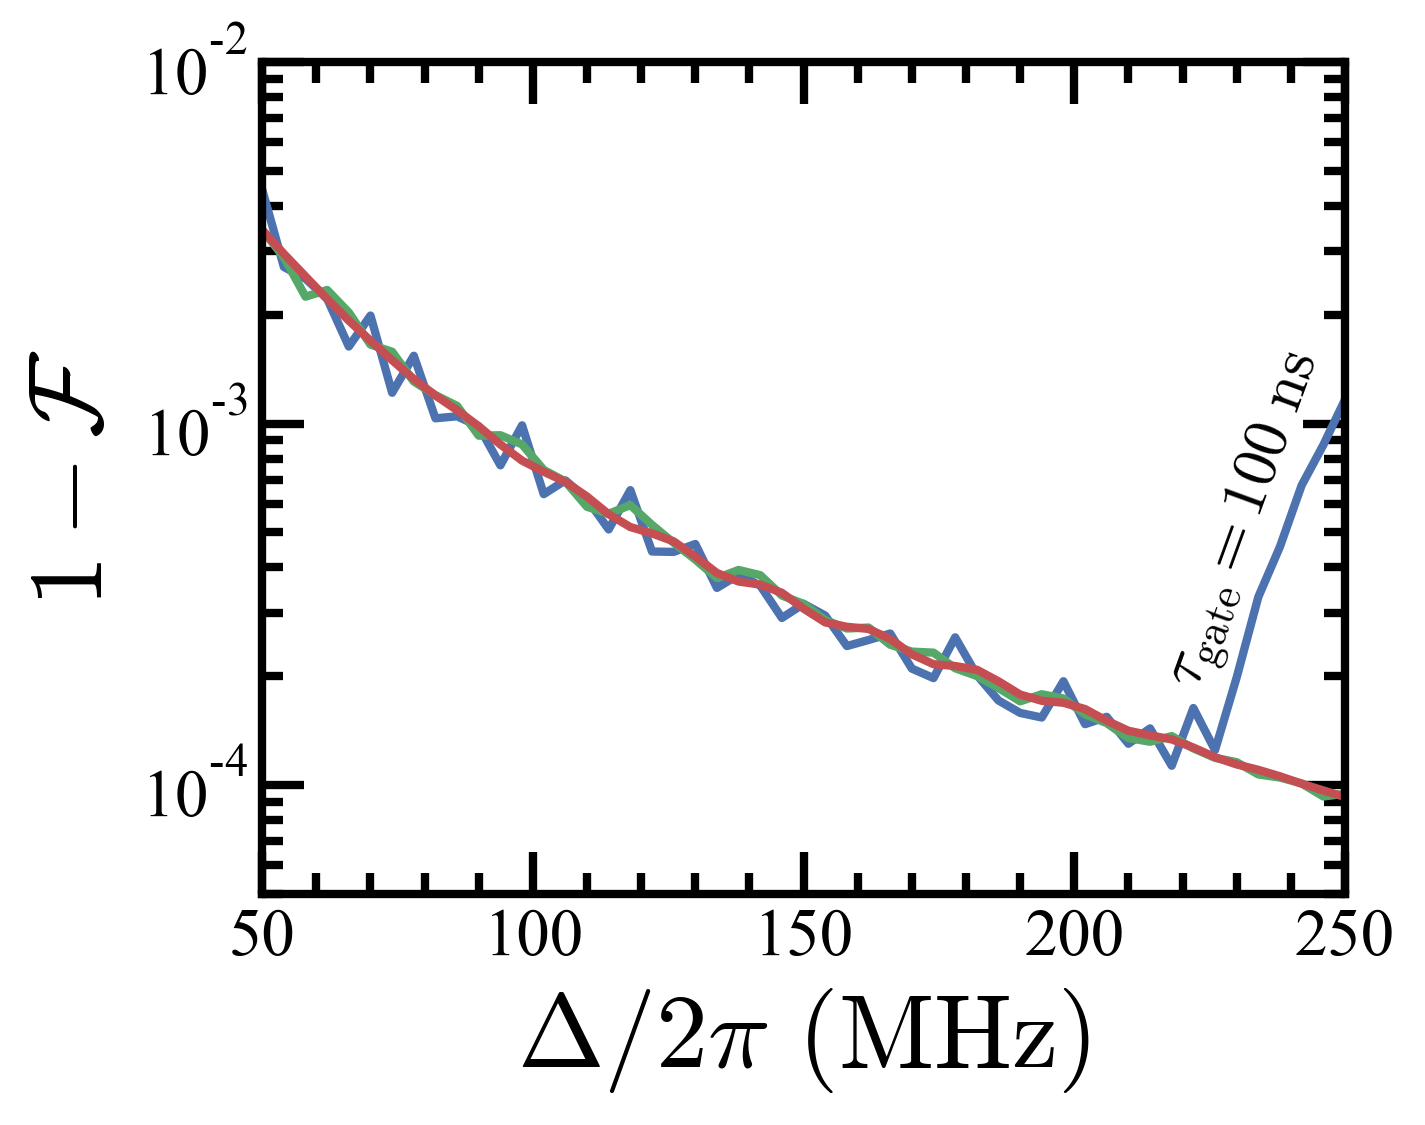

In [17]:
# detuning_array = np.linspace(50,250,51)*1e-3
# T_gate_array = np.linspace(100,300,3)
# infidelity_array=np.load(figpath+'/CR_detune_vs_fidelity_variedtau_TLS.npy')

plt.figure(figsize = [5,4])
plt.plot(detuning_array*1e3, infidelity_array[:,0], linewidth = 2, label = r'$\tau_\mathrm{gate}=100~\mathrm{ns}$')
plt.plot(detuning_array*1e3, infidelity_array[:,1], linewidth = 2, label = r'$\tau_\mathrm{gate}=200~\mathrm{ns}$')
plt.plot(detuning_array*1e3, infidelity_array[:,2], linewidth = 2, label = r'$\tau_\mathrm{gate}=300~\mathrm{ns}$')
plt.yscale("log")
plt.xlabel(r"$\Delta/2\pi~\mathrm{(MHz)}$")
plt.ylabel(r'$1-\mathcal{F}$')
plt.xlim([50,250])
plt.ylim([5e-5,1e-2])
# plt.legend()
plt.text(215,2e-4,r'$\tau_\mathrm{gate}=100~\mathrm{ns}$',rotation = 70)
plt.tight_layout()
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
# figname = 'CR_gate4.pdf'
# plt.savefig(figpath+figname)

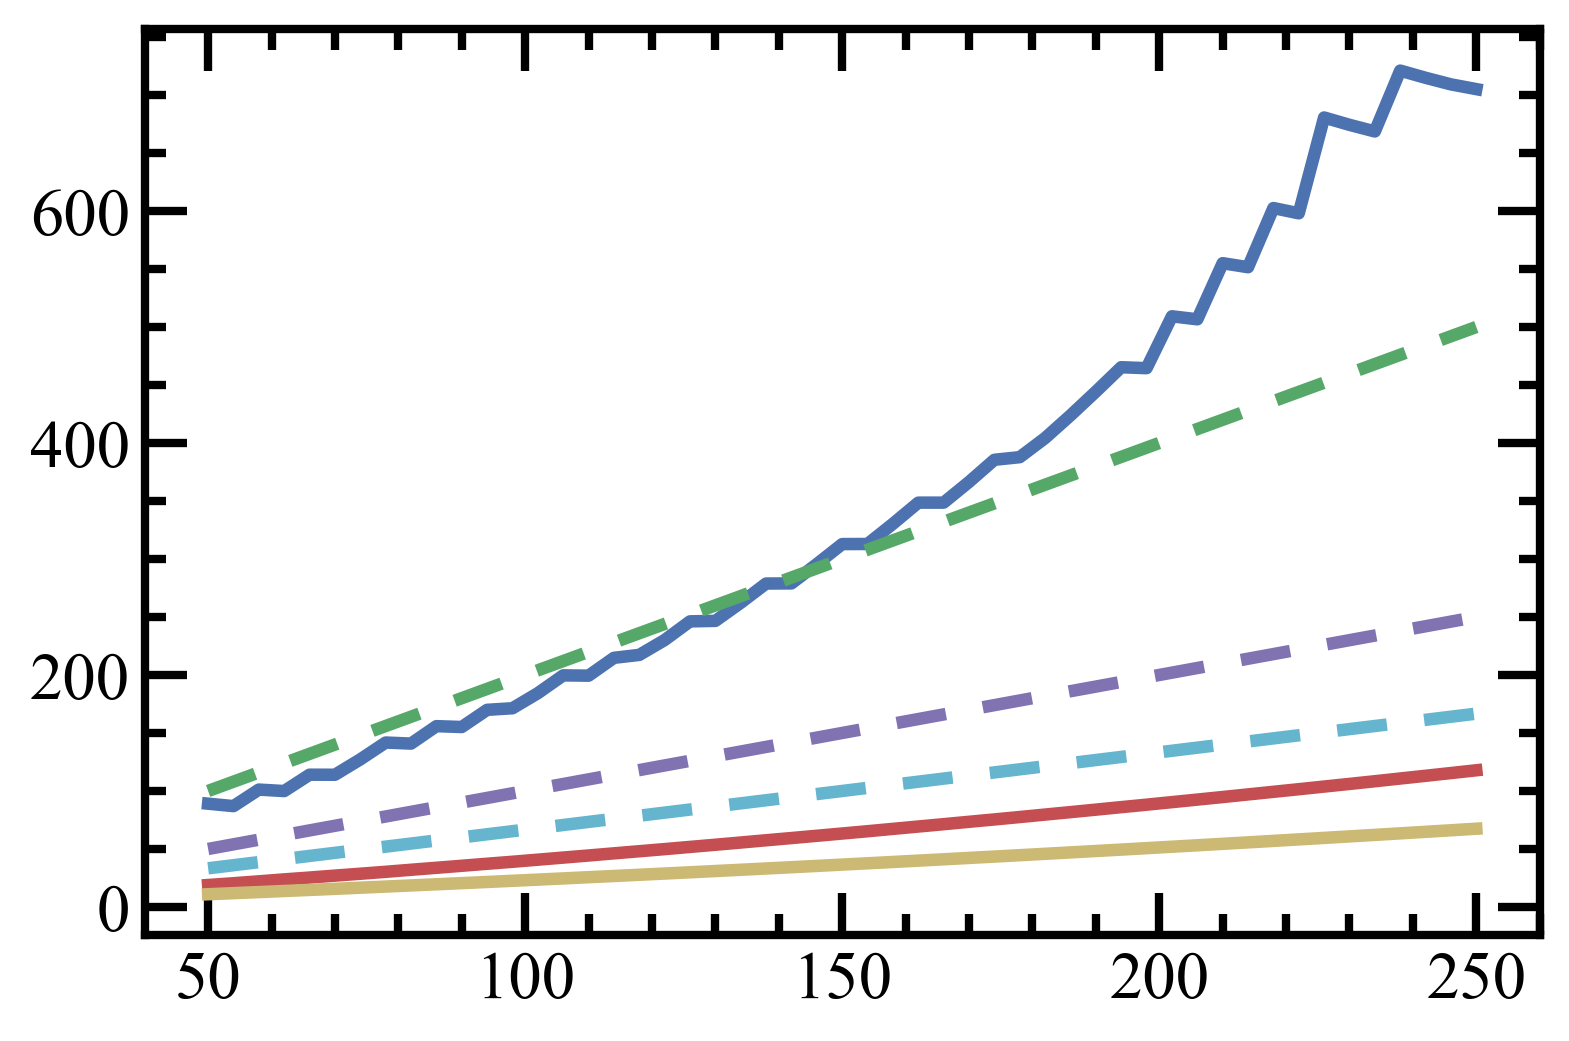

In [498]:
for idx, T_gate in enumerate(T_gate_array):
    plt.plot(detuning_array*1e3, coupl_const_array[:,idx])
    plt.plot(detuning_array*1e3, detuning_array*1e3*2 /(T_gate/100), '--')
# plt.ylim([0,200])

## Sweep detuning, find fidelity, vary qubit-qubit coupling

In [11]:
#Gate parameters to sweep
detuning_array = np.linspace(50,250,51)*1e-3
qcoupling_array = np.linspace(1,10,10)*1e-3

#Qubit frequency
w1 = 0.4
infidelity_array = np.zeros((len(detuning_array),len(qcoupling_array)))
coupl_const_array = np.zeros((len(detuning_array),len(qcoupling_array)))
U_ideal = cnot()
T_start = 0
T_gate = 200
T_rise = 50
t_points = np.linspace(0, T_gate, 2*int(T_gate)+1)
drag = False

for j_idx, J in enumerate(qcoupling_array):
    for d_idx, detuning in enumerate (detuning_array):
        w2 = w1 + detuning
        H0 = two_q_hamiltonian(w1, w2, J)
        eig_energies, eig_states = H0.eigenstates()

        state_00 = eig_states[0]
        state_01 = eig_states[2]
        state_10 = eig_states[1]
        state_11 = eig_states[3]
        drive_freq = eig_energies[2] - eig_energies[0]
        
        def infidelity(x):
            coupl = x[0]
            drive_freq = eig_energies[2]-eig_energies[0]
            coupl_const = coupl*1e-3*2*np.pi
            H1 = coupl_const*(XI)
            U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
            u00 = U_t[-1].matrix_element(state_00, state_00)
            u01 = U_t[-1].matrix_element(state_01, state_01)
            u10 = U_t[-1].matrix_element(state_10, state_10)
            u11 = U_t[-1].matrix_element(state_11, state_11)
            phase1 = np.angle(u01/u00)
            phase2 = np.angle(u10/u00)

            single_qu_z = 0
            single_qu_z = single_qu_z + state_00*state_00.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
            single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
            U = single_qu_z*U_t[-1]

            U_Z2I = tensor(rz(-np.pi/2), qeye(2))
            U_IX2 = tensor(qeye(2), rx(-np.pi/2))
            U_real = U_Z2I * U * U_IX2
            op1 = U_real.dag() * U_real
            op2 = U_real * U_ideal.dag()
            fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
            return 1-fidel
        if d_idx == 0:
            coupl_guess = detuning*1e3*2 /(T_gate/100)
        else:
            coupl_guess = coupl_const_array[d_idx-1,j_idx]
        x0 = [coupl_guess] #guess
        xopt = minimize(infidelity, x0, method ='Powell', tol = None, options ={'xtol': 1e-6,'ftol':1e-7})
        coupl_const_array[d_idx, j_idx] = xopt.x[0]
        infidelity_array [d_idx, j_idx] = infidelity(xopt.x)
        
#Save data here
np.save(figpath+'/CR_detune_vs_fidelity_variedJ_TLS.npy',infidelity_array)

NameError: name 'figpath' is not defined

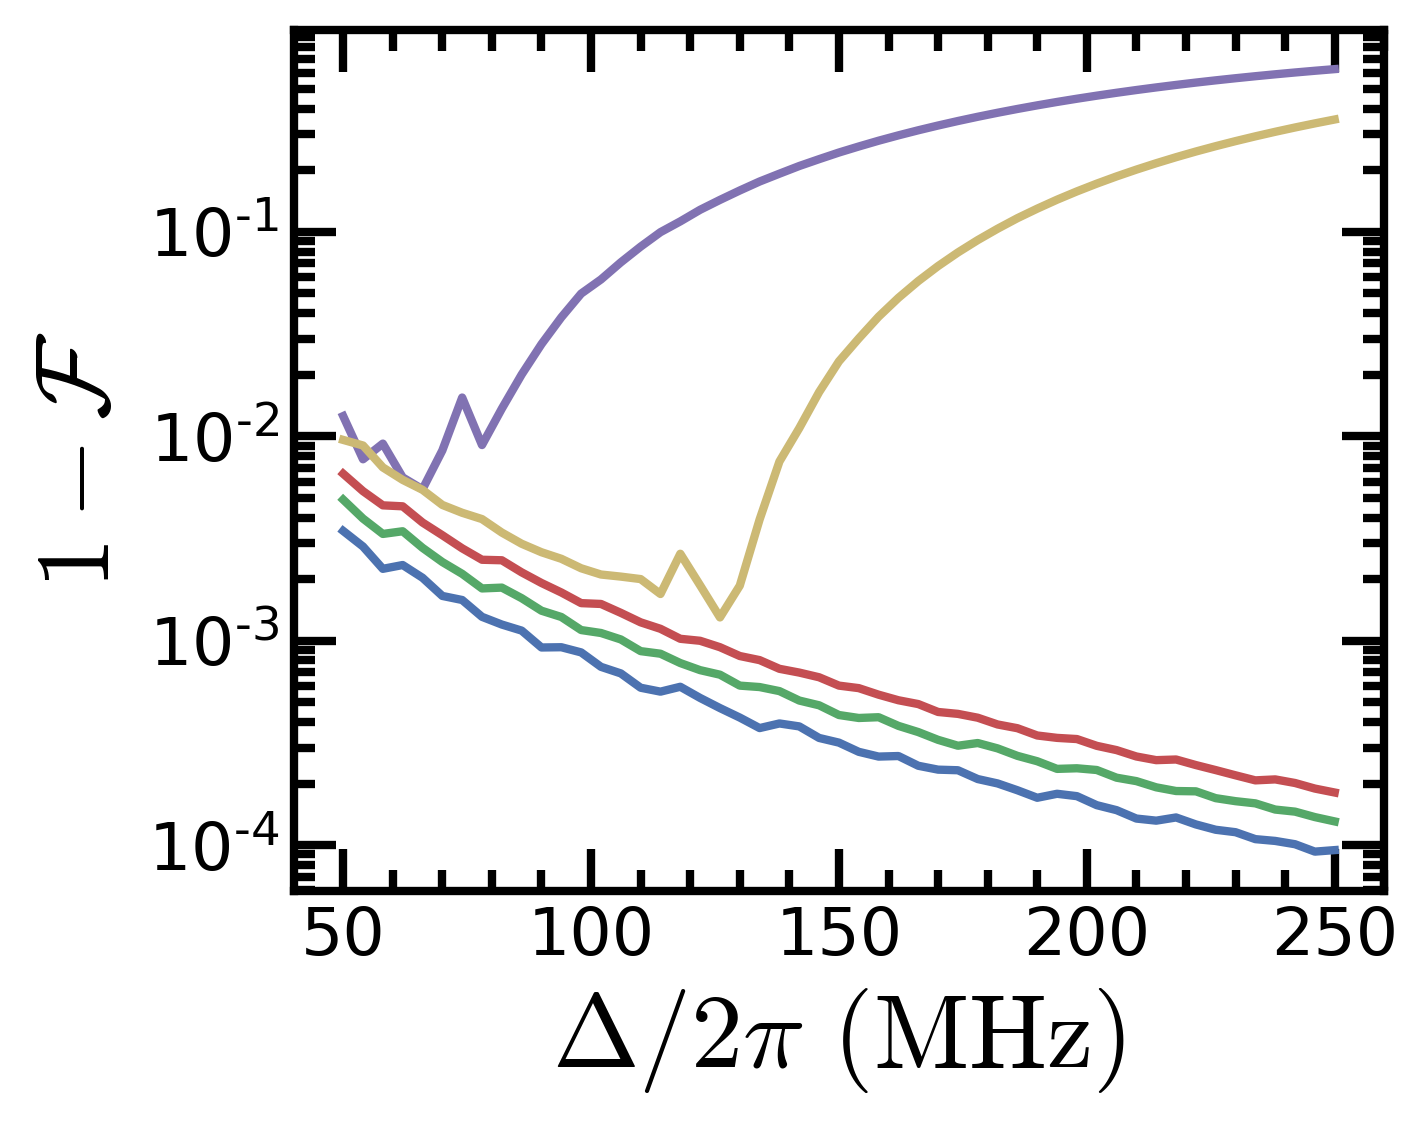

In [12]:
plt.figure(figsize = [5,4])
# plt.plot(detuning_array*1e3, infidelity_array[:,0], linewidth = 2, label = r'$J_C=1~\mathrm{MHz}$')
# plt.plot(detuning_array*1e3, infidelity_array[:,1], linewidth = 2, label = r'$J_C=2~\mathrm{MHz}$')
# plt.plot(detuning_array*1e3, infidelity_array[:,2], linewidth = 2, label = r'$J_C=3~\mathrm{MHz}$')
# plt.plot(detuning_array*1e3, infidelity_array[:,3], linewidth = 2, label = r'$J_C=4~\mathrm{MHz}$')
plt.plot(detuning_array*1e3, infidelity_array[:,4], linewidth = 2, label = r'$J_C=5~\mathrm{MHz}$')
plt.plot(detuning_array*1e3, infidelity_array[:,5], linewidth = 2, label = r'$J_C=6~\mathrm{MHz}$')
plt.plot(detuning_array*1e3, infidelity_array[:,6], linewidth = 2, label = r'$J_C=7~\mathrm{MHz}$')
plt.plot(detuning_array*1e3, infidelity_array[:,7], linewidth = 2, label = r'$J_C=8~\mathrm{MHz}$')
plt.plot(detuning_array*1e3, infidelity_array[:,8], linewidth = 2, label = r'$J_C=9~\mathrm{MHz}$')
# plt.plot(detuning_array*1e3, infidelity_array[:,9], linewidth = 2, label = r'$J_C=10~\mathrm{MHz}$')

plt.yscale("log")
plt.xlabel(r"$\Delta/2\pi~\mathrm{(MHz)}$")
plt.ylabel(r'$1-\mathcal{F}$')
# plt.xlim([50,250])
# plt.ylim([5e-5,1e-2])
# plt.legend()
plt.tight_layout()
# figname = 'CR_gate5.pdf'
# plt.savefig(figpath+figname)

### Subplot

In [ ]:
#Gate parameters to sweep
qcoupling_array = np.linspace(2,10,171)*1e-3
detuning_array = np.linspace(50,250,5)*1e-3

#Qubit frequency
w1 = 0.4
infidelity_array = np.zeros((len(detuning_array),len(qcoupling_array)))
coupl_const_array = np.zeros((len(detuning_array),len(qcoupling_array)))
U_ideal = cnot()
T_start = 0
T_gate = 200
T_rise = 50
t_points = np.linspace(0, T_gate, 2*int(T_gate)+1)
drag = False

for j_idx, J in enumerate(qcoupling_array):
    for d_idx, detuning in enumerate (detuning_array):
        w2 = w1 + detuning
        H0 = two_q_hamiltonian(w1, w2, J)
        eig_energies, eig_states = H0.eigenstates()
        state_00 = eig_states[0]
        state_01 = eig_states[2]
        state_10 = eig_states[1]
        state_11 = eig_states[3]
        drive_freq = eig_energies[2] - eig_energies[0]
        
        def infidelity(x):
            coupl = x[0]
            drive_freq = eig_energies[2]-eig_energies[0]
            coupl_const = coupl*1e-3*2*np.pi
            H1 = coupl_const*(XI)
            U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
            u00 = U_t[-1].matrix_element(state_00, state_00)
            u01 = U_t[-1].matrix_element(state_01, state_01)
            u10 = U_t[-1].matrix_element(state_10, state_10)
            u11 = U_t[-1].matrix_element(state_11, state_11)
            phase1 = np.angle(u01/u00)
            phase2 = np.angle(u10/u00)

            single_qu_z = 0
            single_qu_z = single_qu_z + state_00*state_00.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase1)*state_01*state_01.dag()
            single_qu_z = single_qu_z + np.exp(-1j*phase2)*state_10*state_10.dag()
            single_qu_z = single_qu_z + np.exp(-1j*(phase1 + phase2))*state_11*state_11.dag()
            U = single_qu_z*U_t[-1]

            U_Z2I = tensor(rz(-np.pi/2), qeye(2))
            U_IX2 = tensor(qeye(2), rx(-np.pi/2))
            U_real = U_Z2I * U * U_IX2
            op1 = U_real.dag() * U_real
            op2 = U_real * U_ideal.dag()
            fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
            return 1-fidel
        coupl_guess = (400*detuning)*0.005/J
        x0 = [coupl_guess] #guess
        xopt = minimize(infidelity, x0, method ='Powell', tol = None, options ={'xtol': 1e-6,'ftol':1e-7})
        coupl_const_array[d_idx,j_idx] = xopt.x[0]
        infidelity_array [d_idx,j_idx] = infidelity(xopt.x)
np.save(figpath+'/CR_coupling_vs_fidelity_variedDetune_TLS.npy',infidelity_array)

In [ ]:
qcoupling_array = np.linspace(2,10,171)*1e-3
detuning_array = np.linspace(50,250,5)*1e-3
infidelity_array = np.load(figpath+'/CR_coupling_vs_fidelity_variedDetune_TLS.npy')
plt.figure(figsize = [5,4])
for idx in range(len(detuning_array)):
    plt.plot(qcoupling_array*1e3, infidelity_array [idx,:], linewidth = 1.5)
plt.yscale("log")    
plt.xlim([2,10])
plt.ylim([1e-5,1e-2])
plt.xticks([2,4,6,8,10])
# mpl.rcParams.update({'font.size': 14})
# plt.tick_params(length=1, width=0.5)
plt.xlabel(r"$J_\mathrm{eff}/2\pi~\mathrm{(MHz)}$")
plt.ylabel(r'$1-\mathcal{F}$')
plt.text(2.3,2e-3,r'$\Delta/2\pi=50~\mathrm{MHz}$',rotation = 17, fontsize = 12)
plt.text(6.5,7e-5,r'$\Delta/2\pi=250~\mathrm{MHz}$',rotation = 17, fontsize = 12)
plt.tight_layout()
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
# figname = 'CR_gate_sub2.pdf'
# plt.savefig(figpath+figname)

In [ ]:
#Gate parameters to sweep
qcoupling_array = np.linspace(2,10,171)*1e-3
detuning_array = np.linspace(50,250,5)*1e-3

#Qubit frequency
w1 = 0.4
infidelity_array = np.zeros((len(detuning_array),len(qcoupling_array)))
coupl_const_array = np.zeros((len(detuning_array),len(qcoupling_array)))
U_ideal = cnot()
T_start = 0
T_gate = 200
T_rise = 50
t_points = np.linspace(0, T_gate, 2*int(T_gate)+1)
drag = False

for j_idx, J in enumerate(qcoupling_array):
    for d_idx, detuning in enumerate (detuning_array):
        w2 = w1 + detuning
        H0 = two_q_hamiltonian(w1, w2, J)
        eig_energies, eig_states = H0.eigenstates()
        state_00 = eig_states[0]
        state_01 = eig_states[2]
        state_10 = eig_states[1]
        state_11 = eig_states[3]
        drive_freq = eig_energies[2] - eig_energies[0]
        
        def error(x):
            coupl = x[0]
            eta = 0
            coupl_const = coupl*1e-3*2*np.pi
            H1 = coupl_const*(XI+eta*IX)
            U_t = evol_gates.evolution_operator_microwave_nonorm(H0,H1, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
                T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq)
            sx0 = expect(IX,U_t*state_00)
            sy0 = expect(IY,U_t*state_00)
            sz0 = expect(IZ,U_t*state_00)
            sx1 = expect(IX,U_t*state_10)
            sy1 = expect(IY,U_t*state_10)
            sz1 = expect(IZ,U_t*state_10)
            R = 0.5*np.sqrt((sx0-sx1)**2 + (sy0-sy1)**2+(sz0-sz1)**2)
            return 1.0 - R[-1]

        coupl_guess = (400*detuning)*0.005/J
        x0 = [coupl_guess]
        xopt = minimize(error, x0, method ='Powell', tol = None, options ={'xtol': 1e-6,'ftol':1e-7})
        coupl_const_array[d_idx,j_idx] = xopt.x[0]
        infidelity_array [d_idx,j_idx] = error(xopt.x)
np.save(figpath+'/CR_coupling_vs_R_variedDetune_TLS.npy',infidelity_array)

In [ ]:
qcoupling_array = np.linspace(2,10,171)*1e-3
detuning_array = np.linspace(50,250,5)*1e-3
infidelity_array = np.load(figpath+'/CR_coupling_vs_R_variedDetune_TLS.npy')
plt.figure(figsize = [5, 4])
for idx in range(len(detuning_array)):
    plt.plot(qcoupling_array*1e3, infidelity_array [idx,:], linewidth = 1.5)
plt.yscale("log")    
plt.xlim([2,10])
plt.ylim([1e-5,1e-2])
plt.xticks([2,4,6,8,10])
# mpl.rcParams.update({'font.size': 14})
# plt.tick_params(length=1, width=0.5)
plt.xlabel(r"$J_\mathrm{eff}/2\pi~\mathrm{(MHz)}$")
plt.ylabel(r'$1-\mathcal{R}_\mathrm{max}$')
plt.text(2.3,3e-3,r'$\Delta/2\pi=50~\mathrm{MHz}$',rotation = 15, fontsize = 12)
plt.text(6.5,1.2e-4,r'$\Delta/2\pi=250~\mathrm{MHz}$',rotation = 15, fontsize = 12)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
plt.tight_layout()
# figname = 'CR_gate_sub1.pdf'
# plt.savefig(figpath+figname)